# 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
plt.rc('font',family='Malgun Gothic')
plt.rc('font',size=10)
from sklearn.metrics import mean_absolute_error
import pickle
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore')

# 데이터로드

In [2]:
fm_data_df = pd.DataFrame(columns=['이름','포지션','골','도움','경기당 팀 득점/90',
                                 '경기당 팀 실점/90', 'Cr C/A', 'FA', '반칙 수/90', '기회 창출/90',
                                 '경기당 유효 슈팅/90', '경기당 슈팅/90', 'Int/90', '달린 거리/90분', 
                                 '공중 A/90', '태클 성공률','경기당 패스 시도/90', '경기당 패스 성공/90', 
                                 'K Ps/90', '태클 성공/90', '드리블 성공/90', 
                                 '헤더 성공/90', 'Cr A/90', '평균획득승점/경기'])

fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2021-2022/2021-2022ML.csv',encoding='utf-8-sig')])
fm_data_df = fm_data_df.reset_index(drop=True)
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2022-2023/2022-2023ML.csv',encoding='utf-8-sig')])
fm_data_df = fm_data_df.reset_index(drop=True)
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2023-2024/2023-2024ML.csv',encoding='utf-8-sig')])
fm_data_df = fm_data_df.reset_index(drop=True)

In [3]:
fm_data_df.rename(columns={'Cr C/A':'크로스 성공률','FA':'파울 획득','Int/90':'인터셉트/90','공중 A/90':'공중볼시도/90','K Ps/90':'키패스/90','Cr A/90':'크로스 시도/90'},inplace=True)

In [4]:
fm_data_df = fm_data_df.astype({'골':np.int64,'도움':np.int64,'파울 획득':np.int64,'태클 성공률':np.int64})

In [5]:
forward_df = fm_data_df[fm_data_df['포지션']=='공격수']
midfielder_df = fm_data_df[fm_data_df['포지션']=='미드필더']
defender_df = fm_data_df[fm_data_df['포지션']=='수비수']

In [6]:
forward_df.sort_values(by='평균획득승점/경기',ascending=False)

,이름,포지션,골,도움,경기당 팀 득점/90,경기당 팀 실점/90,크로스 성공률,파울 획득,반칙 수/90,기회 창출/90,경기당 유효 슈팅/90,경기당 슈팅/90,인터셉트/90,달린 거리/90분,공중볼시도/90,태클 성공률,경기당 패스 시도/90,경기당 패스 성공/90,키패스/90,태클 성공/90,드리블 성공/90,헤더 성공/90,크로스 시도/90,평균획득승점/경기,시즌,구단,리그,임대 기간,승,무,패,출장시간
1491,Timo Werner,공격수,7,1,3.06,0.34,30.0,25,0.85,0.17,1.44,3.31,1.10,12.1,8.58,73,31.84,27.25,0.59,1.04,1.61,5.98,1.95,2.89,2022-2023,FC 바이에른,독일 분데스리가,0,17.0,1.0,0.0,1060.0
1498,Dušan Vlahović,공격수,11,4,2.36,0.50,42.0,35,1.18,0.31,1.92,4.77,0.25,11.7,10.97,76,29.01,25.10,0.99,0.95,0.31,7.67,1.18,2.79,2022-2023,FC 바이에른,독일 분데스리가,23/1/27 - 23/6/30,17.0,2.0,0.0,1452.0
92,Leroy Sané,공격수,9,0,2.49,0.91,34.0,16,0.98,0.53,1.43,3.55,0.83,12.8,6.87,85,35.53,29.57,2.49,5.26,1.96,7.33,5.51,2.64,2021-2022,FC 바이에른,독일 분데스리가,0,24.0,2.0,2.0,1193.0
2345,Phil Foden,공격수,14,11,2.19,0.65,20.0,41,0.95,0.46,0.97,2.33,1.18,12.1,3.25,87,50.45,45.38,1.64,1.68,0.99,1.71,1.89,2.57,2022-2023,맨시티,잉글랜드 프리미어 리그,0,42.0,5.0,4.0,3903.0
4204,Christian Eriksen,공격수,7,5,1.79,0.38,28.0,15,0.68,0.17,1.28,2.31,1.11,13.1,4.31,76,43.27,37.12,1.67,2.69,1.03,4.70,1.67,2.57,2023-2024,인테르,이탈리아 세리에 A,0,37.0,7.0,2.0,2107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,Federico Ricci,공격수,4,4,0.58,1.91,27.0,55,0.80,0.15,0.28,0.95,1.46,12.5,6.18,79,32.55,28.33,1.61,1.32,2.39,3.61,9.32,0.45,2023-2024,레지나,이탈리아 세리에 A,0,4.0,6.0,30.0,3583.0
3624,Yanis Begraoui,공격수,7,1,0.86,1.91,40.0,69,0.73,0.16,1.34,2.81,0.41,12.0,11.04,65,29.89,25.82,1.10,0.53,0.77,5.96,0.61,0.45,2023-2024,툴루즈,프랑스 리그 1,0,3.0,4.0,22.0,2210.0
3627,Antoine Leautey,공격수,1,2,0.82,2.10,28.0,12,1.52,0.29,0.52,1.57,1.17,13.3,6.53,85,33.95,29.51,2.16,2.42,1.57,6.00,4.96,0.42,2023-2024,툴루즈,프랑스 리그 1,0,3.0,4.0,24.0,1543.0
1587,Felix Platte,공격수,6,0,1.21,2.60,46.0,48,0.58,0.12,1.33,2.72,0.58,11.4,14.75,81,30.19,26.14,1.16,1.13,0.52,14.09,0.75,0.38,2022-2023,SC 파더보른,독일 분데스리가,0,1.0,7.0,18.0,1556.0


In [7]:
midfielder_df.sort_values(by='평균획득승점/경기',ascending=False)

,이름,포지션,골,도움,경기당 팀 득점/90,경기당 팀 실점/90,크로스 성공률,파울 획득,반칙 수/90,기회 창출/90,경기당 유효 슈팅/90,경기당 슈팅/90,인터셉트/90,달린 거리/90분,공중볼시도/90,태클 성공률,경기당 패스 시도/90,경기당 패스 성공/90,키패스/90,태클 성공/90,드리블 성공/90,헤더 성공/90,크로스 시도/90,평균획득승점/경기,시즌,구단,리그,임대 기간,승,무,패,출장시간
3936,Callum Hudson-Odoi,미드필더,6,4,3.09,0.54,32.0,21,0.54,0.08,1.31,2.47,1.78,12.8,6.10,86,35.04,29.72,2.24,5.35,2.70,7.77,5.25,2.66,2023-2024,첼시,잉글랜드 프리미어 리그,0,25.0,2.0,2.0,1166.0
822,Ander Herrera,미드필더,4,2,1.96,0.67,10.0,14,1.83,0.37,0.37,0.87,1.12,12.8,2.37,69,53.76,50.01,1.12,2.62,0.17,2.43,0.79,2.66,2021-2022,파리-SG,프랑스 리그 1,0,33.0,2.0,3.0,2163.0
3940,Conor Gallagher,미드필더,1,8,2.36,0.51,23.0,11,1.01,0.62,0.73,1.69,0.84,12.7,2.81,80,53.27,48.26,1.07,2.51,0.39,3.66,0.96,2.64,2023-2024,첼시,잉글랜드 프리미어 리그,0,28.0,3.0,2.0,1600.0
99,Corentin Tolisso,미드필더,2,4,2.39,0.74,15.0,4,1.97,0.16,0.58,1.73,1.32,13.0,4.77,88,54.71,49.94,1.23,3.12,0.41,10.51,1.07,2.61,2021-2022,FC 바이에른,독일 분데스리가,0,27.0,5.0,1.0,1094.0
2335,Ferland Mendy,미드필더,2,3,2.19,0.56,29.0,32,1.36,0.11,0.07,0.18,2.87,12.4,6.46,88,49.12,43.79,1.20,2.54,2.85,4.74,8.50,2.59,2022-2023,맨시티,잉글랜드 프리미어 리그,0,38.0,5.0,3.0,3983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Edu Expósito,미드필더,5,4,0.90,2.13,28.0,33,1.30,0.15,0.37,0.90,1.02,12.1,2.85,67,56.46,51.05,0.80,1.17,0.19,2.31,0.65,0.39,2023-2024,에이바르,스페인 프리메라 디비전,0,2.0,8.0,26.0,2909.0
2490,Soualiho Meïté,미드필더,0,0,0.41,1.82,16.0,14,1.33,0.17,0.00,0.17,1.24,12.1,5.39,71,57.27,52.54,1.08,1.64,0.41,4.51,0.50,0.38,2022-2023,웨스트 브롬,잉글랜드 프리미어 리그,0,1.0,3.0,12.0,1086.0
2794,Arthur Masuaku,미드필더,0,1,0.52,1.72,24.0,19,1.49,0.06,0.06,0.23,2.86,12.2,6.19,76,42.57,37.64,1.32,2.81,2.06,4.99,6.59,0.37,2022-2023,칼리아리,이탈리아 세리에 A,0,2.0,1.0,16.0,1571.0
1199,Arnór Sigurðsson,미드필더,1,1,0.48,1.35,30.0,36,1.57,0.04,0.13,0.48,1.26,13.2,6.00,75,35.87,30.22,1.26,1.87,1.61,4.76,3.39,0.37,2021-2022,베네치아,이탈리아 세리에 A,21/7/5 - 22/6/30,1.0,8.0,21.0,2070.0


In [8]:
defender_df.sort_values(by='평균획득승점/경기',ascending=False)

,이름,포지션,골,도움,경기당 팀 득점/90,경기당 팀 실점/90,크로스 성공률,파울 획득,반칙 수/90,기회 창출/90,경기당 유효 슈팅/90,경기당 슈팅/90,인터셉트/90,달린 거리/90분,공중볼시도/90,태클 성공률,경기당 패스 시도/90,경기당 패스 성공/90,키패스/90,태클 성공/90,드리블 성공/90,헤더 성공/90,크로스 시도/90,평균획득승점/경기,시즌,구단,리그,임대 기간,승,무,패,출장시간
3663,João Palhinha,수비수,2,2,2.14,0.17,0.0,8,1.54,0.17,0.17,0.69,0.86,11.6,3.94,87,65.74,61.89,0.94,2.49,0.00,4.50,0.26,2.88,2023-2024,파리-SG,프랑스 리그 1,0,16.0,1.0,0.0,1050.0
2346,John Stones,수비수,0,0,2.24,0.40,0.0,11,0.50,0.10,0.15,0.95,1.50,10.7,10.96,91,54.97,51.13,0.25,1.57,0.25,12.96,0.15,2.80,2022-2023,맨시티,잉글랜드 프리미어 리그,0,27.0,3.0,0.0,1806.0
1161,Marash Kumbulla,수비수,0,2,2.84,0.63,0.0,5,0.95,0.16,0.00,0.32,1.26,9.8,11.75,62,54.58,50.72,0.32,0.80,0.16,12.75,0.08,2.75,2021-2022,로마,이탈리아 세리에 A,20/9/17 - 22/6/30,14.0,2.0,0.0,1141.0
3945,Antonio Rüdiger,수비수,4,3,2.41,0.73,14.0,12,0.99,0.04,0.30,0.52,2.41,10.9,9.80,86,53.19,50.27,0.56,1.71,0.86,8.32,1.46,2.64,2023-2024,첼시,잉글랜드 프리미어 리그,0,22.0,0.0,3.0,2093.0
2339,Fabián,수비수,1,2,2.21,0.74,0.0,22,0.70,0.22,0.04,0.30,0.92,12.0,5.20,75,61.14,57.45,1.00,1.51,0.04,5.25,0.33,2.63,2022-2023,맨시티,잉글랜드 프리미어 리그,0,35.0,3.0,3.0,2439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,Maya Yoshida,수비수,0,2,0.80,1.69,21.0,5,0.90,0.10,0.10,0.60,1.49,10.3,11.45,80,50.97,46.99,0.20,0.96,0.30,11.42,1.39,0.33,2023-2024,툴루즈,프랑스 리그 1,23/7/7 - 24/6/30,1.0,1.0,10.0,904.0
3636,Cédric Hountondji,수비수,0,0,0.58,2.42,0.0,3,0.75,0.08,0.17,0.58,1.67,10.4,13.50,69,53.33,49.58,0.25,0.75,0.00,11.58,0.00,0.25,2023-2024,툴루즈,프랑스 리그 1,0,1.0,0.0,11.0,1080.0
3648,Rocky Bushiri,수비수,0,0,0.59,1.94,51.0,8,1.18,0.17,0.17,0.76,2.87,10.8,10.81,56,50.99,46.27,0.42,1.21,0.08,12.36,2.45,0.24,2023-2024,트르와,프랑스 리그 1,0,1.0,1.0,15.0,1066.0
3647,Jimmy Giraudon,수비수,0,0,0.61,1.75,0.0,7,0.67,0.13,0.00,0.34,1.75,10.3,10.29,100,52.87,50.31,0.34,0.66,0.13,8.10,0.13,0.19,2023-2024,트르와,프랑스 리그 1,0,1.0,0.0,15.0,1338.0


In [9]:
defender_df.columns

Index(['이름', '포지션', '골', '도움', '경기당 팀 득점/90', '경기당 팀 실점/90', '크로스 성공률',
       '파울 획득', '반칙 수/90', '기회 창출/90', '경기당 유효 슈팅/90', '경기당 슈팅/90', '인터셉트/90',
       '달린 거리/90분', '공중볼시도/90', '태클 성공률', '경기당 패스 시도/90', '경기당 패스 성공/90',
       '키패스/90', '태클 성공/90', '드리블 성공/90', '헤더 성공/90', '크로스 시도/90', '평균획득승점/경기',
       '시즌', '구단', '리그', '임대 기간', '승', '무', '패', '출장시간'],
      dtype='object')

In [10]:
use_col = ['골','도움','크로스 성공률','파울 획득','반칙 수/90', '기회 창출/90', '경기당 유효 슈팅/90', '경기당 슈팅/90', '인터셉트/90',
       '달린 거리/90분', '공중볼시도/90', '태클 성공률', '경기당 패스 시도/90', '경기당 패스 성공/90',
       '키패스/90', '태클 성공/90', '드리블 성공/90', '헤더 성공/90', '크로스 시도/90','평균획득승점/경기']

def get_rf_regressor_f_importance(data):
    rf_reg = RandomForestRegressor(n_estimators=1000,random_state=123,bootstrap=True,oob_score=True)
    rf_reg.fit(data.loc[:,use_col[:-1]],data.loc[:,use_col[-1]])
    
    f_importance_dict = {}
    
    for col,fi in zip(use_col[:-1],rf_reg.feature_importances_):
        f_importance_dict[col] = fi
    return sorted(f_importance_dict.items(),key=lambda x : x[1], reverse=True)


forward_fi = get_rf_regressor_f_importance(forward_df)
midfielder_fi = get_rf_regressor_f_importance(midfielder_df)
defender_fi = get_rf_regressor_f_importance(defender_df)

In [11]:
forward_fi 

[('골', 0.14191452683448724),
 ('경기당 유효 슈팅/90', 0.13109548858141606),
 ('공중볼시도/90', 0.08757001491717493),
 ('드리블 성공/90', 0.06752454555324255),
 ('경기당 슈팅/90', 0.06355280497204503),
 ('경기당 패스 시도/90', 0.06208036510118691),
 ('도움', 0.05489210323169936),
 ('태클 성공/90', 0.05119328280788684),
 ('경기당 패스 성공/90', 0.04790113442575771),
 ('키패스/90', 0.047131510716919324),
 ('파울 획득', 0.03289927351994384),
 ('크로스 시도/90', 0.03193592124413982),
 ('반칙 수/90', 0.030316868236964993),
 ('헤더 성공/90', 0.028145927862104767),
 ('인터셉트/90', 0.027014187610562967),
 ('기회 창출/90', 0.025924420782459844),
 ('크로스 성공률', 0.025101735263152465),
 ('달린 거리/90분', 0.022117002732003642),
 ('태클 성공률', 0.021688885606851647)]

In [12]:
midfielder_fi

[('경기당 유효 슈팅/90', 0.12291045101102598),
 ('경기당 패스 시도/90', 0.08583402100235846),
 ('태클 성공/90', 0.08530823776636502),
 ('드리블 성공/90', 0.06813545430589378),
 ('도움', 0.06524654746324332),
 ('공중볼시도/90', 0.05299517284835075),
 ('크로스 시도/90', 0.05001934004280465),
 ('헤더 성공/90', 0.04819642264169581),
 ('경기당 슈팅/90', 0.04761773521690375),
 ('경기당 패스 성공/90', 0.04682671473449295),
 ('기회 창출/90', 0.045467488381670855),
 ('파울 획득', 0.04392127113841008),
 ('반칙 수/90', 0.04199373922869525),
 ('키패스/90', 0.04129256356339057),
 ('인터셉트/90', 0.038442860932387496),
 ('태클 성공률', 0.03256979248774201),
 ('크로스 성공률', 0.031719162710693694),
 ('달린 거리/90분', 0.027480738143072378),
 ('골', 0.02402228638080326)]

In [13]:
defender_fi

[('경기당 패스 시도/90', 0.14568143899385114),
 ('드리블 성공/90', 0.0868179049468631),
 ('헤더 성공/90', 0.06290382706758979),
 ('공중볼시도/90', 0.059609004077409725),
 ('경기당 패스 성공/90', 0.0549551349117865),
 ('크로스 시도/90', 0.053540577955732416),
 ('경기당 슈팅/90', 0.05247313529159307),
 ('태클 성공/90', 0.05017065330764311),
 ('인터셉트/90', 0.048715833893152906),
 ('기회 창출/90', 0.046728629044224576),
 ('파울 획득', 0.045897832351390444),
 ('태클 성공률', 0.04489370421181744),
 ('도움', 0.043732754756514496),
 ('반칙 수/90', 0.043465281829013776),
 ('키패스/90', 0.04197297089265451),
 ('경기당 유효 슈팅/90', 0.039224097301759554),
 ('달린 거리/90분', 0.03578830221109759),
 ('크로스 성공률', 0.028814057347750357),
 ('골', 0.014614859608155463)]

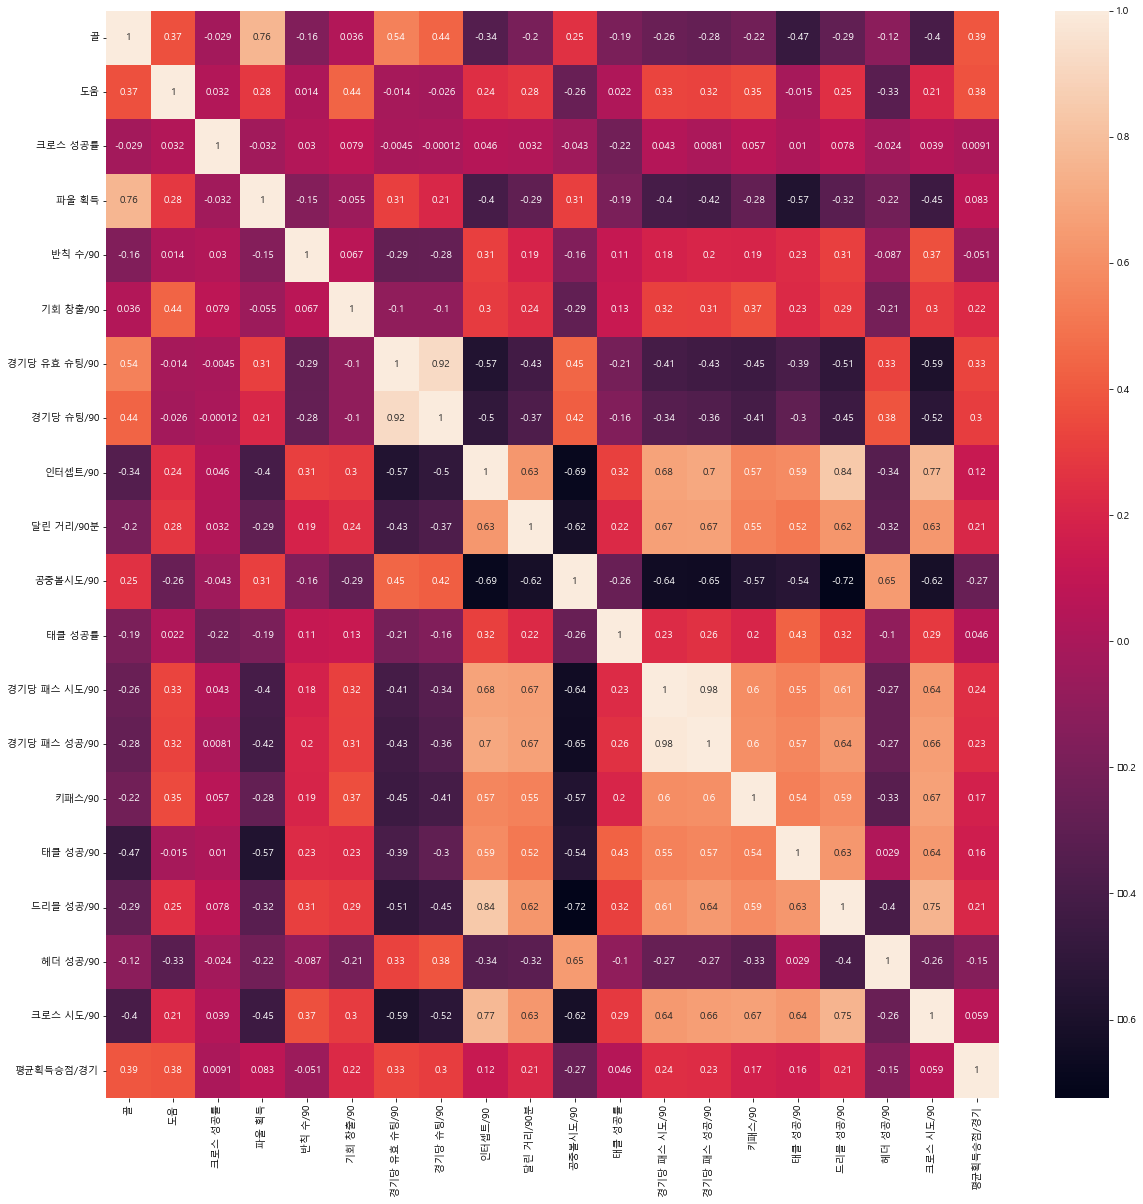

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(forward_df.loc[:,use_col].corr(),annot=True)
plt.show()

In [19]:
def get_corr_use(df):
    
    df = df.loc[:,use_col].corr()

    this_corr = defaultdict(tuple)

    for col in df.columns:
        for index in df.index:
            if df.loc[col,index] <= -0.6:
                this_corr[tuple(set([col,index]))] = df.loc[col,index]
            elif df.loc[col,index] >= 0.6 and df.loc[col,index] < 1.0:
                this_corr[tuple(set([col,index]))] = df.loc[col,index]
            
    return this_corr

In [20]:
forward_corr = get_corr_use(forward_df)
forward_corr

defaultdict(tuple,
            {('파울 획득', '골'): 0.7642620969146571,
             ('경기당 유효 슈팅/90', '경기당 슈팅/90'): 0.9215610231492737,
             ('달린 거리/90분', '인터셉트/90'): 0.6339070539236573,
             ('공중볼시도/90', '인터셉트/90'): -0.6876113072570983,
             ('인터셉트/90', '경기당 패스 시도/90'): 0.6806325982808127,
             ('인터셉트/90', '경기당 패스 성공/90'): 0.7017803216655579,
             ('인터셉트/90', '드리블 성공/90'): 0.8387948593025917,
             ('크로스 시도/90', '인터셉트/90'): 0.7729435704975904,
             ('달린 거리/90분', '공중볼시도/90'): -0.6216326346135025,
             ('달린 거리/90분', '경기당 패스 시도/90'): 0.6680849352067533,
             ('달린 거리/90분', '경기당 패스 성공/90'): 0.6722063666040418,
             ('달린 거리/90분', '드리블 성공/90'): 0.6242737787705839,
             ('달린 거리/90분', '크로스 시도/90'): 0.6330226187836614,
             ('공중볼시도/90', '달린 거리/90분'): -0.6216326346135025,
             ('공중볼시도/90', '경기당 패스 시도/90'): -0.6441390278265262,
             ('공중볼시도/90', '경기당 패스 성공/90'): -0.6541059977786982,
        

In [21]:
midfielder_corr = get_corr_use(midfielder_df)
midfielder_corr

defaultdict(tuple,
            {('경기당 유효 슈팅/90', '골'): 0.7864324400283388,
             ('경기당 슈팅/90', '골'): 0.7328101074071267,
             ('경기당 유효 슈팅/90', '경기당 슈팅/90'): 0.9315286649320219,
             ('공중볼시도/90', '인터셉트/90'): 0.6409126515319767,
             ('크로스 시도/90', '인터셉트/90'): 0.7167917992314737,
             ('공중볼시도/90', '경기당 패스 시도/90'): -0.6169346735150333,
             ('공중볼시도/90', '헤더 성공/90'): 0.7075252578408416,
             ('공중볼시도/90', '크로스 시도/90'): 0.6916439284206687,
             ('경기당 패스 시도/90', '경기당 패스 성공/90'): 0.9909474213206712,
             ('경기당 패스 시도/90', '드리블 성공/90'): -0.7136096695707224,
             ('크로스 시도/90', '경기당 패스 시도/90'): -0.7081921072562923,
             ('드리블 성공/90', '경기당 패스 성공/90'): -0.7012886557667786,
             ('크로스 시도/90', '경기당 패스 성공/90'): -0.6853016956045079,
             ('헤더 성공/90', '태클 성공/90'): 0.6106390540445985,
             ('크로스 시도/90', '드리블 성공/90'): 0.6582456922419817,
             ('크로스 시도/90', '공중볼시도/90'): 0.6916439284206687})

In [22]:
defender_corr = get_corr_use(defender_df)
defender_corr

defaultdict(tuple,
            {('경기당 유효 슈팅/90', '골'): 0.6805204778980262,
             ('달린 거리/90분', '반칙 수/90'): 0.6190578935369947,
             ('경기당 유효 슈팅/90', '경기당 슈팅/90'): 0.7277177431409652,
             ('달린 거리/90분', '공중볼시도/90'): -0.8129105274579482,
             ('달린 거리/90분', '키패스/90'): 0.7869410643682507,
             ('달린 거리/90분', '태클 성공/90'): 0.7531761470153732,
             ('달린 거리/90분', '헤더 성공/90'): -0.6395013038868881,
             ('공중볼시도/90', '달린 거리/90분'): -0.8129105274579482,
             ('공중볼시도/90', '키패스/90'): -0.7134484356176976,
             ('공중볼시도/90', '태클 성공/90'): -0.6733665504908734,
             ('공중볼시도/90', '헤더 성공/90'): 0.852505889986609,
             ('경기당 패스 시도/90', '경기당 패스 성공/90'): 0.9856961408885939,
             ('크로스 시도/90', '경기당 패스 시도/90'): -0.7374301445982063,
             ('크로스 시도/90', '경기당 패스 성공/90'): -0.7569590232811109,
             ('태클 성공/90', '키패스/90'): 0.7335004544046779,
             ('크로스 시도/90', '키패스/90'): 0.6401026288753962,
             

In [23]:
forward_ss = StandardScaler().fit(forward_df.loc[:,use_col[:-1]])
forward_df.loc[:,use_col[:-1]] = forward_ss.transform(forward_df.loc[:,use_col[:-1]])

midfielder_ss = StandardScaler().fit(midfielder_df.loc[:,use_col[:-1]])
midfielder_df.loc[:,use_col[:-1]] = midfielder_ss.transform(midfielder_df.loc[:,use_col[:-1]])

defender_ss = StandardScaler().fit(defender_df.loc[:,use_col[:-1]])
defender_df.loc[:,use_col[:-1]] = defender_ss.transform(defender_df.loc[:,use_col[:-1]])

with open('./models/공격수_ss.pickle','wb') as f:
    pickle.dump(forward_ss,f)
    
with open('./models/미드필더_ss.pickle','wb') as f:
    pickle.dump(midfielder_ss,f)
    
with open('./models/수비수_ss.pickle','wb') as f:
    pickle.dump(defender_ss,f)

In [24]:
forward_pca = PCA(n_components=len(use_col[:-1])).fit(forward_df.loc[:,use_col[:-1]])
forward_df.loc[:,use_col[:-1]] = forward_pca.transform(forward_df.loc[:,use_col[:-1]])


midfielder_pca = PCA(n_components=len(use_col[:-1])).fit(midfielder_df.loc[:,use_col[:-1]])
midfielder_df.loc[:,use_col[:-1]] = midfielder_pca.transform(midfielder_df.loc[:,use_col[:-1]])

defender_pca = PCA(n_components=len(use_col[:-1])).fit(defender_df.loc[:,use_col[:-1]])
defender_df.loc[:,use_col[:-1]] = defender_pca.transform(defender_df.loc[:,use_col[:-1]])


with open('./models/공격수_pca.pickle','wb') as f:
    pickle.dump(forward_pca,f)
    
with open('./models/미드필더_pca.pickle','wb') as f:
    pickle.dump(midfielder_pca,f)
    
with open('./models/수비수_pca.pickle','wb') as f:
    pickle.dump(defender_pca,f)

In [25]:
f_train,f_test = train_test_split(forward_df.loc[:,use_col],test_size=0.3)
m_train,m_test = train_test_split(midfielder_df.loc[:,use_col],test_size=0.3)
d_train,d_test = train_test_split(defender_df.loc[:,use_col],test_size=0.3)

In [27]:
forward_df.loc[:,use_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 4205
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   골             997 non-null    float64
 1   도움            997 non-null    float64
 2   크로스 성공률       997 non-null    float64
 3   파울 획득         997 non-null    float64
 4   반칙 수/90       997 non-null    float64
 5   기회 창출/90      997 non-null    float64
 6   경기당 유효 슈팅/90  997 non-null    float64
 7   경기당 슈팅/90     997 non-null    float64
 8   인터셉트/90       997 non-null    float64
 9   달린 거리/90분     997 non-null    float64
 10  공중볼시도/90      997 non-null    float64
 11  태클 성공률        997 non-null    float64
 12  경기당 패스 시도/90  997 non-null    float64
 13  경기당 패스 성공/90  997 non-null    float64
 14  키패스/90        997 non-null    float64
 15  태클 성공/90      997 non-null    float64
 16  드리블 성공/90     997 non-null    float64
 17  헤더 성공/90      997 non-null    float64
 18  크로스 시도/90     997 non-null   

In [37]:
type(forward_df.loc[:,use_col].values)

numpy.ndarray

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import tensorflow as tf

In [71]:
def make_regressor_and_save(position,df):
    
    split_count = 5
    
    inputs_layer = Input(shape=(19,))
    hidden1 = Dense(256,activation='relu')(inputs_layer)
    hidden2 = Dense(128,activation='relu')(hidden1)
    hidden3 = Dense(64,activation='relu')(hidden2)
    hidden4 = Dense(32,activation='relu')(hidden3)
    output = Dense(1,activation='linear')(hidden4)
    
    model = Model(inputs=[inputs_layer],outputs=[output])
    
    model.compile(loss='mse',optimizer=Adam(lr=0.001))
   
    X,Y = df.loc[:,use_col[:-1]],df.loc[:,use_col[-1]]
    
    kf = KFold(n_splits= split_count)
    kf.get_n_splits(X)
    
    ml_model_list = []
    ml_mae_score_list = []
    
    for train_index, test_index in kf.split(X):
        
        x_train, x_test = tf.constant(X.values[train_index]),tf.constant(X.values[test_index])
        y_train, y_test = tf.constant(Y.values[train_index]), tf.constant(Y.values[test_index])
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=100)
        model.fit(x_train,y_train,batch_size=32,epochs=1000,validation_data=(x_test,y_test))
        
        predict_result=model.predict(x_test)
        mae = mean_absolute_error(y_test,predict_result)
        ml_mae_score_list.append(mae)
        ml_model_list.append(model)
        
    min_val = min(ml_mae_score_list)
    index = ml_mae_score_list.index(min_val)
    
    model.save('./models/'+position+'_nn.h5')
        
    return ml_mae_score_list[index]

In [72]:
make_regressor_and_save('공격수',forward_df.loc[:,use_col])

Epoch 1/1000
25/25 [==============================] - 1s 10ms/step - loss: 0.6650 - val_loss: 0.1963
Epoch 2/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.2087 - val_loss: 0.1731
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1751 - val_loss: 0.1552
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1583 - val_loss: 0.1469
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1435 - val_loss: 0.1451
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1258 - val_loss: 0.1367
Epoch 7/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1154 - val_loss: 0.1361
Epoch 8/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1068 - val_loss: 0.1244
Epoch 9/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 0.1340
Epoch 10/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0853 - val_loss: 0.153

25/25 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.1291
Epoch 83/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.1265
Epoch 84/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.1296
Epoch 85/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.1226
Epoch 86/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.1392
Epoch 87/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.1215
Epoch 88/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.1221
Epoch 89/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.1234
Epoch 90/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.1252
Epoch 91/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.1248
Epoc

25/25 [==============================] - 0s 5ms/step - loss: 9.4271e-04 - val_loss: 0.1193
Epoch 163/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.1213
Epoch 164/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.1166
Epoch 165/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.1163
Epoch 166/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.1185
Epoch 167/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.1229
Epoch 168/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0025 - val_loss: 0.1193
Epoch 169/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.1251
Epoch 170/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.1226
Epoch 171/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss

25/25 [==============================] - 0s 4ms/step - loss: 5.5017e-04 - val_loss: 0.1175
Epoch 242/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.4199e-04 - val_loss: 0.1182
Epoch 243/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.6025e-04 - val_loss: 0.1194
Epoch 244/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.5763e-04 - val_loss: 0.1187
Epoch 245/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.2453e-04 - val_loss: 0.1180
Epoch 246/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.8348e-04 - val_loss: 0.1187
Epoch 247/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.0356e-04 - val_loss: 0.1172
Epoch 248/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.6541e-04 - val_loss: 0.1204
Epoch 249/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.1197
Epoch 250/1000
25/25 [==============================] - 0s 4ms/st

25/25 [==============================] - 0s 4ms/step - loss: 1.3664e-04 - val_loss: 0.1191
Epoch 321/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4885e-04 - val_loss: 0.1183
Epoch 322/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3151e-04 - val_loss: 0.1180
Epoch 323/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0569e-04 - val_loss: 0.1185
Epoch 324/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.2588e-05 - val_loss: 0.1190
Epoch 325/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0725e-04 - val_loss: 0.1188
Epoch 326/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0182e-04 - val_loss: 0.1189
Epoch 327/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0332e-04 - val_loss: 0.1184
Epoch 328/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.6256e-05 - val_loss: 0.1187
Epoch 329/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 3.3651e-04 - val_loss: 0.1161
Epoch 399/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8899e-04 - val_loss: 0.1154
Epoch 400/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.5608e-04 - val_loss: 0.1144
Epoch 401/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.1134
Epoch 402/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.1312
Epoch 403/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.1150
Epoch 404/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.1154
Epoch 405/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.1085
Epoch 406/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.1143
Epoch 407/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0086 - 

25/25 [==============================] - 0s 4ms/step - loss: 1.5447e-04 - val_loss: 0.1120
Epoch 477/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1363e-04 - val_loss: 0.1121
Epoch 478/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.9930e-05 - val_loss: 0.1110
Epoch 479/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.6175e-05 - val_loss: 0.1120
Epoch 480/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.2702e-05 - val_loss: 0.1116
Epoch 481/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.6753e-05 - val_loss: 0.1118
Epoch 482/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.1638e-05 - val_loss: 0.1116
Epoch 483/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.8654e-05 - val_loss: 0.1125
Epoch 484/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1265e-04 - val_loss: 0.1110
Epoch 485/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 7.8529e-04 - val_loss: 0.1127
Epoch 555/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.2832e-04 - val_loss: 0.1129
Epoch 556/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.1150
Epoch 557/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.1151
Epoch 558/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.1157
Epoch 559/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.1165
Epoch 560/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.1118
Epoch 561/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.1077
Epoch 562/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.1111
Epoch 563/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0022 - val_

25/25 [==============================] - 0s 4ms/step - loss: 3.8939e-04 - val_loss: 0.1128
Epoch 633/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.0852e-04 - val_loss: 0.1117
Epoch 634/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.0503e-04 - val_loss: 0.1123
Epoch 635/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.7082e-04 - val_loss: 0.1135
Epoch 636/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.1643e-04 - val_loss: 0.1118
Epoch 637/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.8860e-04 - val_loss: 0.1123
Epoch 638/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.1292e-04 - val_loss: 0.1134
Epoch 639/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.1177
Epoch 640/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.1139
Epoch 641/1000
25/25 [==============================] - 0s 4ms/step -

25/25 [==============================] - 0s 4ms/step - loss: 5.8015e-05 - val_loss: 0.1122
Epoch 711/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8246e-05 - val_loss: 0.1123
Epoch 712/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.2076e-05 - val_loss: 0.1125
Epoch 713/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2521e-05 - val_loss: 0.1126
Epoch 714/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.9974e-05 - val_loss: 0.1126
Epoch 715/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5978e-05 - val_loss: 0.1119
Epoch 716/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5190e-05 - val_loss: 0.1121
Epoch 717/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2053e-05 - val_loss: 0.1113
Epoch 718/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7436e-05 - val_loss: 0.1120
Epoch 719/1000
25/25 [==============================] - 0s 4m

Epoch 788/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.1998e-04 - val_loss: 0.1117
Epoch 789/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.4091e-04 - val_loss: 0.1110
Epoch 790/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.8602e-04 - val_loss: 0.1119
Epoch 791/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.9817e-04 - val_loss: 0.1129
Epoch 792/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.2345e-04 - val_loss: 0.1115
Epoch 793/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.1104
Epoch 794/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.1117
Epoch 795/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.8419e-04 - val_loss: 0.1114
Epoch 796/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.1147
Epoch 797/1000
25/25 [==============================] - 0s

Epoch 866/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.3960e-04 - val_loss: 0.1119
Epoch 867/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.0797e-04 - val_loss: 0.1096
Epoch 868/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.1207e-04 - val_loss: 0.1115
Epoch 869/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.8330e-04 - val_loss: 0.1095
Epoch 870/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.3795e-04 - val_loss: 0.1111
Epoch 871/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.2315e-04 - val_loss: 0.1121
Epoch 872/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.8786e-04 - val_loss: 0.1118
Epoch 873/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.2097e-04 - val_loss: 0.1107
Epoch 874/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.0171e-04 - val_loss: 0.1120
Epoch 875/1000
25/25 [========================

25/25 [==============================] - 0s 4ms/step - loss: 3.9295e-05 - val_loss: 0.1152
Epoch 944/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.7530e-05 - val_loss: 0.1137
Epoch 945/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.2988e-05 - val_loss: 0.1139
Epoch 946/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.4417e-05 - val_loss: 0.1149
Epoch 947/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.5122e-05 - val_loss: 0.1148
Epoch 948/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.6392e-05 - val_loss: 0.1147
Epoch 949/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.5383e-05 - val_loss: 0.1153
Epoch 950/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6368e-04 - val_loss: 0.1153
Epoch 951/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5605e-04 - val_loss: 0.1143
Epoch 952/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 6.9776e-05 - val_loss: 0.0176
Epoch 22/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.5471e-05 - val_loss: 0.0175
Epoch 23/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.4083e-05 - val_loss: 0.0174
Epoch 24/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.0515e-05 - val_loss: 0.0179
Epoch 25/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.9848e-05 - val_loss: 0.0175
Epoch 26/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.7656e-05 - val_loss: 0.0176
Epoch 27/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.7775e-05 - val_loss: 0.0177
Epoch 28/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.6962e-05 - val_loss: 0.0176
Epoch 29/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.4908e-05 - val_loss: 0.0175
Epoch 30/1000
25/25 [==============================] - 0s 4ms/step - 

25/25 [==============================] - 0s 4ms/step - loss: 8.5895e-04 - val_loss: 0.0187
Epoch 100/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.2914e-04 - val_loss: 0.0190
Epoch 101/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.2192e-04 - val_loss: 0.0183
Epoch 102/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.5590e-04 - val_loss: 0.0178
Epoch 103/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6387e-04 - val_loss: 0.0187
Epoch 104/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6623e-04 - val_loss: 0.0174
Epoch 105/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2828e-04 - val_loss: 0.0186
Epoch 106/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.9642e-04 - val_loss: 0.0182
Epoch 107/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6919e-04 - val_loss: 0.0185
Epoch 108/1000
25/25 [==============================] - 0s 4m

Epoch 177/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9645e-05 - val_loss: 0.0209
Epoch 178/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8158e-05 - val_loss: 0.0210
Epoch 179/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7574e-05 - val_loss: 0.0210
Epoch 180/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4831e-05 - val_loss: 0.0211
Epoch 181/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.5606e-05 - val_loss: 0.0209
Epoch 182/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6871e-05 - val_loss: 0.0211
Epoch 183/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4236e-05 - val_loss: 0.0208
Epoch 184/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.3157e-05 - val_loss: 0.0211
Epoch 185/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.1253e-05 - val_loss: 0.0210
Epoch 186/1000
25/25 [========================

Epoch 255/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0277
Epoch 256/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0279
Epoch 257/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0294
Epoch 258/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.6926e-04 - val_loss: 0.0287
Epoch 259/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.2376e-04 - val_loss: 0.0282
Epoch 260/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.1608e-04 - val_loss: 0.0285
Epoch 261/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.6569e-04 - val_loss: 0.0277
Epoch 262/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6236e-04 - val_loss: 0.0278
Epoch 263/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3816e-04 - val_loss: 0.0271
Epoch 264/1000
25/25 [==============================] - 0s

25/25 [==============================] - 0s 5ms/step - loss: 3.9023e-05 - val_loss: 0.0295
Epoch 333/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.2371e-05 - val_loss: 0.0302
Epoch 334/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.8372e-05 - val_loss: 0.0296
Epoch 335/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5248e-05 - val_loss: 0.0297
Epoch 336/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.2202e-05 - val_loss: 0.0294
Epoch 337/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.0043e-05 - val_loss: 0.0298
Epoch 338/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.1208e-05 - val_loss: 0.0294
Epoch 339/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.0844e-05 - val_loss: 0.0302
Epoch 340/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1696e-04 - val_loss: 0.0293
Epoch 341/1000
25/25 [==============================] - 0s 5m

Epoch 410/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7393e-04 - val_loss: 0.0342
Epoch 411/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0985e-04 - val_loss: 0.0340
Epoch 412/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.2022e-05 - val_loss: 0.0341
Epoch 413/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.2539e-05 - val_loss: 0.0345
Epoch 414/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.2641e-05 - val_loss: 0.0347
Epoch 415/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.8339e-05 - val_loss: 0.0340
Epoch 416/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.4376e-05 - val_loss: 0.0345
Epoch 417/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.3104e-05 - val_loss: 0.0344
Epoch 418/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.0865e-05 - val_loss: 0.0346
Epoch 419/1000
25/25 [========================

25/25 [==============================] - 0s 4ms/step - loss: 1.5717e-04 - val_loss: 0.0366
Epoch 488/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5667e-04 - val_loss: 0.0377
Epoch 489/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6997e-04 - val_loss: 0.0367
Epoch 490/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5646e-04 - val_loss: 0.0374
Epoch 491/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8444e-04 - val_loss: 0.0364
Epoch 492/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.7276e-04 - val_loss: 0.0374
Epoch 493/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8095e-04 - val_loss: 0.0373
Epoch 494/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8078e-04 - val_loss: 0.0372
Epoch 495/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8413e-04 - val_loss: 0.0380
Epoch 496/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 2.1210e-04 - val_loss: 0.0424
Epoch 565/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2378e-04 - val_loss: 0.0425
Epoch 566/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.1205e-05 - val_loss: 0.0420
Epoch 567/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.8462e-05 - val_loss: 0.0426
Epoch 568/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5420e-05 - val_loss: 0.0419
Epoch 569/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2779e-05 - val_loss: 0.0426
Epoch 570/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2588e-05 - val_loss: 0.0423
Epoch 571/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6339e-05 - val_loss: 0.0423
Epoch 572/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3394e-05 - val_loss: 0.0423
Epoch 573/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 9.0900e-05 - val_loss: 0.0433
Epoch 642/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.8215e-05 - val_loss: 0.0440
Epoch 643/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0509e-04 - val_loss: 0.0437
Epoch 644/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1883e-04 - val_loss: 0.0444
Epoch 645/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0372e-04 - val_loss: 0.0443
Epoch 646/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.3807e-05 - val_loss: 0.0442
Epoch 647/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.3422e-05 - val_loss: 0.0443
Epoch 648/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.4276e-05 - val_loss: 0.0435
Epoch 649/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4024e-04 - val_loss: 0.0442
Epoch 650/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 3.3939e-04 - val_loss: 0.0453
Epoch 719/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.0990e-04 - val_loss: 0.0462
Epoch 720/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8520e-04 - val_loss: 0.0451
Epoch 721/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6651e-04 - val_loss: 0.0454
Epoch 722/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2510e-04 - val_loss: 0.0465
Epoch 723/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9285e-04 - val_loss: 0.0474
Epoch 724/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3634e-04 - val_loss: 0.0461
Epoch 725/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1779e-04 - val_loss: 0.0472
Epoch 726/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.2634e-05 - val_loss: 0.0463
Epoch 727/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 1.1049e-04 - val_loss: 0.0486
Epoch 796/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.9541e-05 - val_loss: 0.0484
Epoch 797/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.5430e-05 - val_loss: 0.0489
Epoch 798/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.0814e-05 - val_loss: 0.0484
Epoch 799/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0521e-04 - val_loss: 0.0485
Epoch 800/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2295e-04 - val_loss: 0.0496
Epoch 801/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2174e-04 - val_loss: 0.0482
Epoch 802/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3489e-04 - val_loss: 0.0495
Epoch 803/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7538e-04 - val_loss: 0.0484
Epoch 804/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 1.9406e-04 - val_loss: 0.0503
Epoch 873/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6458e-04 - val_loss: 0.0524
Epoch 874/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2872e-04 - val_loss: 0.0506
Epoch 875/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4408e-04 - val_loss: 0.0519
Epoch 876/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2114e-04 - val_loss: 0.0512
Epoch 877/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.7236e-05 - val_loss: 0.0516
Epoch 878/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.4383e-05 - val_loss: 0.0510
Epoch 879/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.1050e-05 - val_loss: 0.0521
Epoch 880/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.2264e-05 - val_loss: 0.0512
Epoch 881/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 4ms/step - loss: 1.5612e-04 - val_loss: 0.0523
Epoch 950/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4668e-04 - val_loss: 0.0536
Epoch 951/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1170e-04 - val_loss: 0.0534
Epoch 952/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.3306e-04 - val_loss: 0.0555
Epoch 953/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.9694e-04 - val_loss: 0.0540
Epoch 954/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.5206e-04 - val_loss: 0.0553
Epoch 955/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.5374e-04 - val_loss: 0.0552
Epoch 956/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.3477e-04 - val_loss: 0.0541
Epoch 957/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6304e-04 - val_loss: 0.0551
Epoch 958/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 6.4342e-06 - val_loss: 0.0054
Epoch 27/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.4426e-06 - val_loss: 0.0054
Epoch 28/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5650e-05 - val_loss: 0.0055
Epoch 29/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2727e-05 - val_loss: 0.0054
Epoch 30/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2924e-05 - val_loss: 0.0054
Epoch 31/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.2973e-05 - val_loss: 0.0055
Epoch 32/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.6967e-05 - val_loss: 0.0055
Epoch 33/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.4804e-05 - val_loss: 0.0054
Epoch 34/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0367e-04 - val_loss: 0.0057
Epoch 35/1000
25/25 [==============================] - 0s 5ms/step - 

25/25 [==============================] - 0s 5ms/step - loss: 1.2517e-04 - val_loss: 0.0059
Epoch 105/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2395e-04 - val_loss: 0.0055
Epoch 106/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5482e-04 - val_loss: 0.0056
Epoch 107/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4192e-04 - val_loss: 0.0055
Epoch 108/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1309e-04 - val_loss: 0.0055
Epoch 109/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.4263e-05 - val_loss: 0.0056
Epoch 110/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.5165e-05 - val_loss: 0.0055
Epoch 111/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.7817e-05 - val_loss: 0.0055
Epoch 112/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.6396e-05 - val_loss: 0.0057
Epoch 113/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 4ms/step - loss: 4.0212e-04 - val_loss: 0.0062
Epoch 182/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.0094e-04 - val_loss: 0.0061
Epoch 183/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.8169e-04 - val_loss: 0.0061
Epoch 184/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3564e-04 - val_loss: 0.0058
Epoch 185/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5238e-04 - val_loss: 0.0062
Epoch 186/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2317e-04 - val_loss: 0.0059
Epoch 187/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.7274e-05 - val_loss: 0.0058
Epoch 188/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0696e-04 - val_loss: 0.0061
Epoch 189/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.9464e-05 - val_loss: 0.0058
Epoch 190/1000
25/25 [==============================] - 0s 6m

25/25 [==============================] - 0s 9ms/step - loss: 6.6621e-04 - val_loss: 0.0076
Epoch 259/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.6977e-04 - val_loss: 0.0076
Epoch 260/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.0586e-04 - val_loss: 0.0078
Epoch 261/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.8664e-04 - val_loss: 0.0076
Epoch 262/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.6967e-04 - val_loss: 0.0085
Epoch 263/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.5320e-04 - val_loss: 0.0085
Epoch 264/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 265/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.0207e-04 - val_loss: 0.0072
Epoch 266/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.5771e-04 - val_loss: 0.0080
Epoch 267/1000
25/25 [==============================] - 0s 4ms/st

25/25 [==============================] - 0s 4ms/step - loss: 2.8129e-05 - val_loss: 0.0093
Epoch 336/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.9408e-05 - val_loss: 0.0092
Epoch 337/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.1062e-05 - val_loss: 0.0093
Epoch 338/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.3296e-05 - val_loss: 0.0092
Epoch 339/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.3058e-05 - val_loss: 0.0095
Epoch 340/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.7208e-05 - val_loss: 0.0092
Epoch 341/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.9033e-05 - val_loss: 0.0094
Epoch 342/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.4098e-05 - val_loss: 0.0094
Epoch 343/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3411e-04 - val_loss: 0.0094
Epoch 344/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 3.7308e-05 - val_loss: 0.0109
Epoch 413/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.4654e-05 - val_loss: 0.0108
Epoch 414/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8310e-05 - val_loss: 0.0109
Epoch 415/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2717e-05 - val_loss: 0.0109
Epoch 416/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4210e-05 - val_loss: 0.0109
Epoch 417/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0682e-05 - val_loss: 0.0108
Epoch 418/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7059e-05 - val_loss: 0.0110
Epoch 419/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5498e-05 - val_loss: 0.0109
Epoch 420/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3417e-05 - val_loss: 0.0108
Epoch 421/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 2.4584e-04 - val_loss: 0.0123
Epoch 490/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.7490e-04 - val_loss: 0.0123
Epoch 491/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.8659e-04 - val_loss: 0.0125
Epoch 492/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2473e-04 - val_loss: 0.0124
Epoch 493/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7462e-04 - val_loss: 0.0121
Epoch 494/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4970e-04 - val_loss: 0.0120
Epoch 495/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5023e-04 - val_loss: 0.0121
Epoch 496/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3241e-04 - val_loss: 0.0125
Epoch 497/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.9461e-05 - val_loss: 0.0122
Epoch 498/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 6.7186e-05 - val_loss: 0.0140
Epoch 567/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.2980e-05 - val_loss: 0.0138
Epoch 568/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.0642e-05 - val_loss: 0.0138
Epoch 569/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5372e-05 - val_loss: 0.0141
Epoch 570/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.9516e-05 - val_loss: 0.0139
Epoch 571/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.8614e-05 - val_loss: 0.0140
Epoch 572/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.9338e-05 - val_loss: 0.0139
Epoch 573/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.0587e-05 - val_loss: 0.0143
Epoch 574/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.8030e-05 - val_loss: 0.0141
Epoch 575/1000
25/25 [==============================] - 0s 7m

25/25 [==============================] - 0s 4ms/step - loss: 6.9154e-05 - val_loss: 0.0156
Epoch 644/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.2160e-05 - val_loss: 0.0158
Epoch 645/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.3873e-05 - val_loss: 0.0158
Epoch 646/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.8769e-05 - val_loss: 0.0158
Epoch 647/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.6679e-05 - val_loss: 0.0158
Epoch 648/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.6317e-05 - val_loss: 0.0156
Epoch 649/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.2609e-05 - val_loss: 0.0156
Epoch 650/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.5043e-05 - val_loss: 0.0156
Epoch 651/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.3828e-05 - val_loss: 0.0157
Epoch 652/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 8.8943e-04 - val_loss: 0.0195
Epoch 721/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.0691e-04 - val_loss: 0.0196
Epoch 722/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.7715e-04 - val_loss: 0.0188
Epoch 723/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.7057e-04 - val_loss: 0.0188
Epoch 724/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.4035e-04 - val_loss: 0.0192
Epoch 725/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6440e-04 - val_loss: 0.0193
Epoch 726/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4620e-04 - val_loss: 0.0189
Epoch 727/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1433e-04 - val_loss: 0.0185
Epoch 728/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9775e-04 - val_loss: 0.0191
Epoch 729/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 7.0930e-05 - val_loss: 0.0205
Epoch 798/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.5530e-05 - val_loss: 0.0205
Epoch 799/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.3605e-05 - val_loss: 0.0210
Epoch 800/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.2212e-05 - val_loss: 0.0206
Epoch 801/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0910e-04 - val_loss: 0.0207
Epoch 802/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1739e-04 - val_loss: 0.0210
Epoch 803/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.2010e-04 - val_loss: 0.0209
Epoch 804/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5002e-04 - val_loss: 0.0207
Epoch 805/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1038e-04 - val_loss: 0.0208
Epoch 806/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 4.6107e-05 - val_loss: 0.0228
Epoch 875/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.7449e-05 - val_loss: 0.0226
Epoch 876/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8151e-05 - val_loss: 0.0227
Epoch 877/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7957e-05 - val_loss: 0.0227
Epoch 878/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2011e-05 - val_loss: 0.0228
Epoch 879/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0355e-05 - val_loss: 0.0228
Epoch 880/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.2880e-06 - val_loss: 0.0227
Epoch 881/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.7508e-06 - val_loss: 0.0227
Epoch 882/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.8363e-06 - val_loss: 0.0228
Epoch 883/1000
25/25 [==============================] - 0s 6m

25/25 [==============================] - 0s 5ms/step - loss: 1.3493e-04 - val_loss: 0.0236
Epoch 952/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0197e-04 - val_loss: 0.0235
Epoch 953/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.7629e-05 - val_loss: 0.0234
Epoch 954/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.0025e-05 - val_loss: 0.0233
Epoch 955/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.7179e-05 - val_loss: 0.0236
Epoch 956/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2482e-05 - val_loss: 0.0236
Epoch 957/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.1187e-05 - val_loss: 0.0236
Epoch 958/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8697e-05 - val_loss: 0.0237
Epoch 959/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4163e-05 - val_loss: 0.0238
Epoch 960/1000
25/25 [==============================] - 0s 4m

Epoch 29/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3997e-05 - val_loss: 0.0019
Epoch 30/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5776e-05 - val_loss: 0.0019
Epoch 31/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9041e-05 - val_loss: 0.0018
Epoch 32/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9514e-05 - val_loss: 0.0019
Epoch 33/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0210e-05 - val_loss: 0.0018
Epoch 34/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9675e-05 - val_loss: 0.0019
Epoch 35/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4031e-05 - val_loss: 0.0018
Epoch 36/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.9821e-05 - val_loss: 0.0018
Epoch 37/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2626e-05 - val_loss: 0.0019
Epoch 38/1000
25/25 [==============================] - 

Epoch 107/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2414e-04 - val_loss: 0.0019
Epoch 108/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7745e-04 - val_loss: 0.0018
Epoch 109/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7711e-04 - val_loss: 0.0019
Epoch 110/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0160e-04 - val_loss: 0.0020
Epoch 111/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6603e-04 - val_loss: 0.0018
Epoch 112/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.5253e-04 - val_loss: 0.0018
Epoch 113/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4925e-04 - val_loss: 0.0017
Epoch 114/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7550e-04 - val_loss: 0.0019
Epoch 115/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0586e-04 - val_loss: 0.0019
Epoch 116/1000
25/25 [========================

25/25 [==============================] - 0s 6ms/step - loss: 2.3825e-05 - val_loss: 0.0021
Epoch 185/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3852e-05 - val_loss: 0.0021
Epoch 186/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.0524e-05 - val_loss: 0.0021
Epoch 187/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.1223e-05 - val_loss: 0.0021
Epoch 188/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.5956e-05 - val_loss: 0.0021
Epoch 189/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.2851e-05 - val_loss: 0.0020
Epoch 190/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6252e-05 - val_loss: 0.0020
Epoch 191/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8120e-05 - val_loss: 0.0021
Epoch 192/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.1444e-05 - val_loss: 0.0020
Epoch 193/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 6.2501e-04 - val_loss: 0.0026
Epoch 262/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.4367e-04 - val_loss: 0.0032
Epoch 263/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.7131e-04 - val_loss: 0.0025
Epoch 264/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.7546e-04 - val_loss: 0.0029
Epoch 265/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4221e-04 - val_loss: 0.0027
Epoch 266/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1219e-04 - val_loss: 0.0028
Epoch 267/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8257e-04 - val_loss: 0.0026
Epoch 268/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4573e-04 - val_loss: 0.0025
Epoch 269/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8740e-04 - val_loss: 0.0028
Epoch 270/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 3.2059e-05 - val_loss: 0.0033
Epoch 339/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8595e-05 - val_loss: 0.0033
Epoch 340/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.6748e-05 - val_loss: 0.0031
Epoch 341/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.7351e-05 - val_loss: 0.0033
Epoch 342/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0647e-04 - val_loss: 0.0032
Epoch 343/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0350e-04 - val_loss: 0.0035
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6168e-04 - val_loss: 0.0032
Epoch 345/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7903e-04 - val_loss: 0.0035
Epoch 346/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6908e-04 - val_loss: 0.0036
Epoch 347/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 7ms/step - loss: 6.4474e-04 - val_loss: 0.0063
Epoch 416/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.6310e-04 - val_loss: 0.0053
Epoch 417/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.5366e-04 - val_loss: 0.0058
Epoch 418/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.1596e-04 - val_loss: 0.0049
Epoch 419/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.7416e-04 - val_loss: 0.0062
Epoch 420/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.5692e-04 - val_loss: 0.0053
Epoch 421/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.9909e-04 - val_loss: 0.0050
Epoch 422/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2227e-04 - val_loss: 0.0050
Epoch 423/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4515e-04 - val_loss: 0.0051
Epoch 424/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 1.7154e-05 - val_loss: 0.0056
Epoch 493/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3342e-05 - val_loss: 0.0053
Epoch 494/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.3356e-05 - val_loss: 0.0055
Epoch 495/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.9493e-05 - val_loss: 0.0052
Epoch 496/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.0480e-05 - val_loss: 0.0053
Epoch 497/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.0511e-05 - val_loss: 0.0055
Epoch 498/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.3025e-05 - val_loss: 0.0057
Epoch 499/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3313e-04 - val_loss: 0.0056
Epoch 500/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6331e-04 - val_loss: 0.0055
Epoch 501/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 2.2110e-04 - val_loss: 0.0068
Epoch 570/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7926e-04 - val_loss: 0.0068
Epoch 571/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3441e-04 - val_loss: 0.0067
Epoch 572/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.9238e-05 - val_loss: 0.0065
Epoch 573/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.1248e-05 - val_loss: 0.0064
Epoch 574/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.9230e-05 - val_loss: 0.0064
Epoch 575/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.4903e-05 - val_loss: 0.0065
Epoch 576/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.2024e-05 - val_loss: 0.0063
Epoch 577/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.0607e-05 - val_loss: 0.0065
Epoch 578/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 5.1234e-05 - val_loss: 0.0072
Epoch 647/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.0695e-05 - val_loss: 0.0078
Epoch 648/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1892e-04 - val_loss: 0.0071
Epoch 649/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.6884e-04 - val_loss: 0.0074
Epoch 650/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.8247e-04 - val_loss: 0.0075
Epoch 651/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9504e-04 - val_loss: 0.0079
Epoch 652/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0352e-04 - val_loss: 0.0078
Epoch 653/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4298e-04 - val_loss: 0.0077
Epoch 654/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3321e-04 - val_loss: 0.0078
Epoch 655/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 1.6973e-06 - val_loss: 0.0087
Epoch 724/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.3450e-06 - val_loss: 0.0087
Epoch 725/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.7777e-07 - val_loss: 0.0087
Epoch 726/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.8719e-07 - val_loss: 0.0087
Epoch 727/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6142e-07 - val_loss: 0.0087
Epoch 728/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.5097e-07 - val_loss: 0.0087
Epoch 729/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3221e-07 - val_loss: 0.0087
Epoch 730/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3752e-07 - val_loss: 0.0087
Epoch 731/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.1112e-07 - val_loss: 0.0087
Epoch 732/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 2.1989e-04 - val_loss: 0.0090
Epoch 801/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3929e-04 - val_loss: 0.0098
Epoch 802/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3149e-04 - val_loss: 0.0094
Epoch 803/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.6196e-04 - val_loss: 0.0099
Epoch 804/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4140e-04 - val_loss: 0.0098
Epoch 805/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9427e-04 - val_loss: 0.0097
Epoch 806/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7777e-04 - val_loss: 0.0098
Epoch 807/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8920e-04 - val_loss: 0.0104
Epoch 808/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2325e-04 - val_loss: 0.0099
Epoch 809/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 6.3597e-05 - val_loss: 0.0097
Epoch 878/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2059e-04 - val_loss: 0.0100
Epoch 879/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4921e-04 - val_loss: 0.0094
Epoch 880/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4344e-04 - val_loss: 0.0097
Epoch 881/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.6401e-04 - val_loss: 0.0106
Epoch 882/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5041e-04 - val_loss: 0.0106
Epoch 883/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.0862e-04 - val_loss: 0.0108
Epoch 884/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.5979e-04 - val_loss: 0.0125
Epoch 885/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.6658e-04 - val_loss: 0.0120
Epoch 886/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 4ms/step - loss: 2.6324e-06 - val_loss: 0.0107
Epoch 955/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6562e-06 - val_loss: 0.0106
Epoch 956/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6582e-06 - val_loss: 0.0106
Epoch 957/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.0012e-06 - val_loss: 0.0106
Epoch 958/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.5488e-06 - val_loss: 0.0107
Epoch 959/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.7783e-06 - val_loss: 0.0106
Epoch 960/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.5603e-06 - val_loss: 0.0106
Epoch 961/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.3378e-06 - val_loss: 0.0106
Epoch 962/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.5859e-06 - val_loss: 0.0108
Epoch 963/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 2.3812e-06 - val_loss: 9.8552e-04
Epoch 32/1000
25/25 [==============================] - 0s 7ms/step - loss: 2.5116e-06 - val_loss: 9.8908e-04
Epoch 33/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.2301e-06 - val_loss: 9.8167e-04
Epoch 34/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5438e-06 - val_loss: 9.8626e-04
Epoch 35/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.8905e-06 - val_loss: 9.8481e-04
Epoch 36/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.9640e-06 - val_loss: 9.8994e-04
Epoch 37/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5143e-06 - val_loss: 9.8289e-04
Epoch 38/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.8806e-06 - val_loss: 9.8660e-04
Epoch 39/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.0259e-06 - val_loss: 9.7643e-04
Epoch 40/1000
25/25 [============

25/25 [==============================] - 0s 4ms/step - loss: 2.6349e-04 - val_loss: 0.0011
Epoch 109/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.7053e-04 - val_loss: 0.0013
Epoch 110/1000
25/25 [==============================] - 0s 4ms/step - loss: 4.0678e-04 - val_loss: 0.0016
Epoch 111/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.5780e-04 - val_loss: 0.0015
Epoch 112/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6691e-04 - val_loss: 0.0012
Epoch 113/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.2541e-04 - val_loss: 0.0014
Epoch 114/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8442e-04 - val_loss: 0.0012
Epoch 115/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0824e-04 - val_loss: 0.0013
Epoch 116/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9668e-04 - val_loss: 0.0011
Epoch 117/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 1.9747e-05 - val_loss: 0.0015
Epoch 186/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2897e-05 - val_loss: 0.0016
Epoch 187/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2472e-05 - val_loss: 0.0015
Epoch 188/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0431e-05 - val_loss: 0.0015
Epoch 189/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0999e-05 - val_loss: 0.0015
Epoch 190/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.6958e-05 - val_loss: 0.0015
Epoch 191/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.4057e-05 - val_loss: 0.0015
Epoch 192/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.0096e-05 - val_loss: 0.0015
Epoch 193/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.5423e-05 - val_loss: 0.0015
Epoch 194/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 5ms/step - loss: 2.8228e-05 - val_loss: 0.0019
Epoch 263/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2877e-05 - val_loss: 0.0020
Epoch 264/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8531e-05 - val_loss: 0.0019
Epoch 265/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4786e-05 - val_loss: 0.0018
Epoch 266/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4843e-05 - val_loss: 0.0018
Epoch 267/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7198e-05 - val_loss: 0.0018
Epoch 268/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4807e-05 - val_loss: 0.0019
Epoch 269/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4873e-05 - val_loss: 0.0018
Epoch 270/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3968e-05 - val_loss: 0.0020
Epoch 271/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 2.8609e-04 - val_loss: 0.0027
Epoch 340/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.1465e-04 - val_loss: 0.0034
Epoch 341/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.6279e-04 - val_loss: 0.0026
Epoch 342/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4681e-04 - val_loss: 0.0035
Epoch 343/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.8047e-04 - val_loss: 0.0032
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.9038e-04 - val_loss: 0.0034
Epoch 345/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.4933e-04 - val_loss: 0.0033
Epoch 346/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.4440e-04 - val_loss: 0.0030
Epoch 347/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.5192e-04 - val_loss: 0.0026
Epoch 348/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 7ms/step - loss: 3.7850e-06 - val_loss: 0.0030
Epoch 417/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.7563e-06 - val_loss: 0.0030
Epoch 418/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.8461e-06 - val_loss: 0.0031
Epoch 419/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.2777e-06 - val_loss: 0.0031
Epoch 420/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.8086e-06 - val_loss: 0.0030
Epoch 421/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.5320e-06 - val_loss: 0.0030
Epoch 422/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.4333e-06 - val_loss: 0.0031
Epoch 423/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.4550e-06 - val_loss: 0.0031
Epoch 424/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.8989e-06 - val_loss: 0.0031
Epoch 425/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 5.0034e-06 - val_loss: 0.0046
Epoch 494/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.0312e-06 - val_loss: 0.0045
Epoch 495/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.0295e-06 - val_loss: 0.0045
Epoch 496/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4312e-06 - val_loss: 0.0045
Epoch 497/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3130e-06 - val_loss: 0.0045
Epoch 498/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1510e-06 - val_loss: 0.0045
Epoch 499/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0280e-06 - val_loss: 0.0046
Epoch 500/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.8104e-07 - val_loss: 0.0045
Epoch 501/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.7000e-07 - val_loss: 0.0045
Epoch 502/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 2.2334e-04 - val_loss: 0.0047
Epoch 571/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.0821e-04 - val_loss: 0.0051
Epoch 572/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9931e-04 - val_loss: 0.0052
Epoch 573/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5961e-04 - val_loss: 0.0054
Epoch 574/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1655e-04 - val_loss: 0.0052
Epoch 575/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1074e-04 - val_loss: 0.0054
Epoch 576/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1993e-04 - val_loss: 0.0054
Epoch 577/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.8428e-05 - val_loss: 0.0048
Epoch 578/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.0086e-05 - val_loss: 0.0052
Epoch 579/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 1.0507e-04 - val_loss: 0.0059
Epoch 648/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2655e-04 - val_loss: 0.0057
Epoch 649/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4350e-04 - val_loss: 0.0058
Epoch 650/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2435e-04 - val_loss: 0.0056
Epoch 651/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1340e-04 - val_loss: 0.0059
Epoch 652/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5037e-04 - val_loss: 0.0058
Epoch 653/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3387e-04 - val_loss: 0.0055
Epoch 654/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3096e-04 - val_loss: 0.0057
Epoch 655/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0696e-04 - val_loss: 0.0057
Epoch 656/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 5ms/step - loss: 1.7176e-04 - val_loss: 0.0066
Epoch 725/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2148e-04 - val_loss: 0.0067
Epoch 726/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.2681e-05 - val_loss: 0.0065
Epoch 727/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.4909e-05 - val_loss: 0.0070
Epoch 728/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.1235e-05 - val_loss: 0.0065
Epoch 729/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.8217e-05 - val_loss: 0.0068
Epoch 730/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.9225e-05 - val_loss: 0.0065
Epoch 731/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.3571e-05 - val_loss: 0.0064
Epoch 732/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.0590e-05 - val_loss: 0.0065
Epoch 733/1000
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 4ms/step - loss: 2.6319e-04 - val_loss: 0.0078
Epoch 802/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0530e-04 - val_loss: 0.0082
Epoch 803/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1358e-04 - val_loss: 0.0080
Epoch 804/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.3401e-04 - val_loss: 0.0090
Epoch 805/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2033e-04 - val_loss: 0.0080
Epoch 806/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1738e-04 - val_loss: 0.0086
Epoch 807/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.1149e-04 - val_loss: 0.0082
Epoch 808/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.2039e-04 - val_loss: 0.0081
Epoch 809/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.5077e-04 - val_loss: 0.0086
Epoch 810/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 4.8068e-05 - val_loss: 0.0083
Epoch 879/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.0385e-05 - val_loss: 0.0085
Epoch 880/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.3793e-05 - val_loss: 0.0088
Epoch 881/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.8665e-05 - val_loss: 0.0082
Epoch 882/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.1823e-05 - val_loss: 0.0078
Epoch 883/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.2344e-05 - val_loss: 0.0085
Epoch 884/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.9242e-05 - val_loss: 0.0085
Epoch 885/1000
25/25 [==============================] - 0s 4ms/step - loss: 7.0314e-05 - val_loss: 0.0089
Epoch 886/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.0329e-05 - val_loss: 0.0087
Epoch 887/1000
25/25 [==============================] - 0s 4m

25/25 [==============================] - 0s 4ms/step - loss: 8.5940e-06 - val_loss: 0.0099
Epoch 956/1000
25/25 [==============================] - 0s 4ms/step - loss: 9.7498e-06 - val_loss: 0.0098
Epoch 957/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0702e-05 - val_loss: 0.0099
Epoch 958/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4976e-05 - val_loss: 0.0097
Epoch 959/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0161e-05 - val_loss: 0.0100
Epoch 960/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.8574e-05 - val_loss: 0.0100
Epoch 961/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.6153e-05 - val_loss: 0.0099
Epoch 962/1000
25/25 [==============================] - 0s 4ms/step - loss: 5.0926e-05 - val_loss: 0.0102
Epoch 963/1000
25/25 [==============================] - 0s 4ms/step - loss: 6.9644e-05 - val_loss: 0.0099
Epoch 964/1000
25/25 [==============================] - 0s 4m

0.07806141638875606

In [73]:
make_regressor_and_save('미드필더',midfielder_df.loc[:,use_col])

Epoch 1/1000
53/53 [==============================] - 1s 5ms/step - loss: 0.3612 - val_loss: 0.2461
Epoch 2/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.2014 - val_loss: 0.2001
Epoch 3/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1709 - val_loss: 0.1934
Epoch 4/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1609 - val_loss: 0.1977
Epoch 5/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1485 - val_loss: 0.1807
Epoch 6/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1348 - val_loss: 0.1730
Epoch 7/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1253 - val_loss: 0.1946
Epoch 8/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1146 - val_loss: 0.1783
Epoch 9/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.1063 - val_loss: 0.1785
Epoch 10/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0991 - val_loss: 0.1671

53/53 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2040
Epoch 83/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.1997
Epoch 84/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.1994
Epoch 85/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.2061
Epoch 86/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.2041
Epoch 87/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.2041
Epoch 88/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.2005
Epoch 89/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.2042
Epoch 90/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.1959
Epoch 91/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.2025
Epoc

53/53 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.1992
Epoch 163/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.2081
Epoch 164/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.1963
Epoch 165/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.1934
Epoch 166/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.1919
Epoch 167/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.1988
Epoch 168/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.1960
Epoch 169/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.1906
Epoch 170/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.1974
Epoch 171/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.

53/53 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.1941
Epoch 243/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.1920
Epoch 244/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.1953
Epoch 245/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.1984
Epoch 246/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.1997
Epoch 247/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.1953
Epoch 248/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.1904
Epoch 249/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.1931
Epoch 250/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.1885
Epoch 251/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.

53/53 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.1861
Epoch 323/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.1903
Epoch 324/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1901
Epoch 325/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.1963
Epoch 326/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.1934
Epoch 327/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1905
Epoch 328/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1924
Epoch 329/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1915
Epoch 330/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.1882
Epoch 331/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.

53/53 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.1876
Epoch 403/1000
53/53 [==============================] - 0s 3ms/step - loss: 8.4926e-04 - val_loss: 0.1886
Epoch 404/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.4708e-04 - val_loss: 0.1886
Epoch 405/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.1886
Epoch 406/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1868
Epoch 407/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1865
Epoch 408/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.1955
Epoch 409/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.1898
Epoch 410/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.1918
Epoch 411/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0017 - val_

53/53 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.2005
Epoch 482/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.1907
Epoch 483/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.1945
Epoch 484/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.1912
Epoch 485/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.1913
Epoch 486/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1931
Epoch 487/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.6178e-04 - val_loss: 0.1931
Epoch 488/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.8207e-04 - val_loss: 0.1928
Epoch 489/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.1303e-04 - val_loss: 0.1919
Epoch 490/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.8374e-0

Epoch 560/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.1953
Epoch 561/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.1891
Epoch 562/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.1895
Epoch 563/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.1936
Epoch 564/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.1902
Epoch 565/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.1904
Epoch 566/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.1914
Epoch 567/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.1924
Epoch 568/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.1899
Epoch 569/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0016

53/53 [==============================] - 0s 4ms/step - loss: 1.6064e-04 - val_loss: 0.1923
Epoch 639/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3426e-04 - val_loss: 0.1919
Epoch 640/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1735e-04 - val_loss: 0.1918
Epoch 641/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0870e-04 - val_loss: 0.1916
Epoch 642/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1156e-04 - val_loss: 0.1918
Epoch 643/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1547e-04 - val_loss: 0.1925
Epoch 644/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4014e-04 - val_loss: 0.1914
Epoch 645/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4035e-04 - val_loss: 0.1909
Epoch 646/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7828e-04 - val_loss: 0.1923
Epoch 647/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.1914
Epoch 717/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.1940
Epoch 718/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.1953
Epoch 719/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.6024e-04 - val_loss: 0.1940
Epoch 720/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.7543e-04 - val_loss: 0.1892
Epoch 721/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.6965e-04 - val_loss: 0.1926
Epoch 722/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5540e-04 - val_loss: 0.1907
Epoch 723/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.3064e-04 - val_loss: 0.1899
Epoch 724/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.5125e-04 - val_loss: 0.1894
Epoch 725/1000
53/53 [==============================] - 0s 4ms/step - los

53/53 [==============================] - 0s 4ms/step - loss: 8.8926e-04 - val_loss: 0.1929
Epoch 795/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.1867
Epoch 796/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.1896
Epoch 797/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.1892
Epoch 798/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.1903
Epoch 799/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.1891
Epoch 800/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.1868
Epoch 801/1000
53/53 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.1921
Epoch 802/1000
53/53 [==============================] - 0s 5ms/step - loss: 9.2712e-04 - val_loss: 0.1894
Epoch 803/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.3030e-04 - 

53/53 [==============================] - 0s 4ms/step - loss: 9.0814e-05 - val_loss: 0.1888
Epoch 873/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.8757e-05 - val_loss: 0.1885
Epoch 874/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.1492e-05 - val_loss: 0.1890
Epoch 875/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0271e-04 - val_loss: 0.1889
Epoch 876/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.3228e-05 - val_loss: 0.1884
Epoch 877/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.8763e-05 - val_loss: 0.1885
Epoch 878/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2112e-04 - val_loss: 0.1882
Epoch 879/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5609e-04 - val_loss: 0.1884
Epoch 880/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0485e-04 - val_loss: 0.1876
Epoch 881/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.1961
Epoch 951/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.1944
Epoch 952/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.1915
Epoch 953/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.1755e-04 - val_loss: 0.1939
Epoch 954/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.9674e-04 - val_loss: 0.1933
Epoch 955/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.4629e-04 - val_loss: 0.1891
Epoch 956/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.0000e-04 - val_loss: 0.1915
Epoch 957/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.3492e-04 - val_loss: 0.1913
Epoch 958/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.2649e-04 - val_loss: 0.1904
Epoch 959/1000
53/53 [==============================] - 0s 4ms/step - los

53/53 [==============================] - 0s 4ms/step - loss: 9.6149e-04 - val_loss: 0.0259
Epoch 29/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.5928e-04 - val_loss: 0.0253
Epoch 30/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.7024e-04 - val_loss: 0.0248
Epoch 31/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.2061e-04 - val_loss: 0.0263
Epoch 32/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0248
Epoch 33/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0246
Epoch 34/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0249
Epoch 35/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0248
Epoch 36/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0256
Epoch 37/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_l

53/53 [==============================] - 0s 4ms/step - loss: 5.3355e-04 - val_loss: 0.0258
Epoch 108/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.1573e-04 - val_loss: 0.0263
Epoch 109/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5040e-04 - val_loss: 0.0261
Epoch 110/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.3121e-04 - val_loss: 0.0265
Epoch 111/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.3035e-04 - val_loss: 0.0260
Epoch 112/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.4871e-04 - val_loss: 0.0261
Epoch 113/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.8977e-04 - val_loss: 0.0262
Epoch 114/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.4671e-04 - val_loss: 0.0262
Epoch 115/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.9914e-04 - val_loss: 0.0264
Epoch 116/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 7.0608e-04 - val_loss: 0.0295
Epoch 186/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0303
Epoch 187/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0298
Epoch 188/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0310
Epoch 189/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0305
Epoch 190/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0306
Epoch 191/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0329
Epoch 192/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0316
Epoch 193/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0326
Epoch 194/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss

53/53 [==============================] - 0s 4ms/step - loss: 4.2164e-04 - val_loss: 0.0319
Epoch 264/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.4268e-04 - val_loss: 0.0321
Epoch 265/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.6920e-04 - val_loss: 0.0316
Epoch 266/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0319
Epoch 267/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0318
Epoch 268/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0316
Epoch 269/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0341
Epoch 270/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0336
Epoch 271/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0343
Epoch 272/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0019 - 

53/53 [==============================] - 0s 4ms/step - loss: 1.9050e-04 - val_loss: 0.0343
Epoch 342/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4776e-04 - val_loss: 0.0344
Epoch 343/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2447e-04 - val_loss: 0.0346
Epoch 344/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3332e-04 - val_loss: 0.0342
Epoch 345/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3415e-04 - val_loss: 0.0342
Epoch 346/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2748e-04 - val_loss: 0.0343
Epoch 347/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2614e-04 - val_loss: 0.0347
Epoch 348/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2418e-04 - val_loss: 0.0337
Epoch 349/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3270e-04 - val_loss: 0.0345
Epoch 350/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0382
Epoch 420/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.8250e-04 - val_loss: 0.0390
Epoch 421/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.6510e-04 - val_loss: 0.0390
Epoch 422/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.7186e-04 - val_loss: 0.0386
Epoch 423/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.1748e-04 - val_loss: 0.0390
Epoch 424/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.3151e-04 - val_loss: 0.0380
Epoch 425/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7800e-04 - val_loss: 0.0385
Epoch 426/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.4462e-04 - val_loss: 0.0383
Epoch 427/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8757e-04 - val_loss: 0.0382
Epoch 428/1000
53/53 [==============================] - 0s 4ms/st

Epoch 497/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4337e-04 - val_loss: 0.0414
Epoch 498/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9302e-04 - val_loss: 0.0419
Epoch 499/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7683e-04 - val_loss: 0.0423
Epoch 500/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.7739e-04 - val_loss: 0.0421
Epoch 501/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.3087e-04 - val_loss: 0.0424
Epoch 502/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.3136e-04 - val_loss: 0.0409
Epoch 503/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.5880e-04 - val_loss: 0.0436
Epoch 504/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0442
Epoch 505/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.4506e-04 - val_loss: 0.0442
Epoch 506/1000
53/53 [============================

53/53 [==============================] - 0s 4ms/step - loss: 2.3137e-04 - val_loss: 0.0449
Epoch 575/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1526e-04 - val_loss: 0.0444
Epoch 576/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.2367e-04 - val_loss: 0.0447
Epoch 577/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.2995e-04 - val_loss: 0.0440
Epoch 578/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.5680e-04 - val_loss: 0.0446
Epoch 579/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.2655e-04 - val_loss: 0.0455
Epoch 580/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5997e-04 - val_loss: 0.0438
Epoch 581/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.7300e-04 - val_loss: 0.0449
Epoch 582/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.6449e-04 - val_loss: 0.0454
Epoch 583/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.1454e-04 - val_loss: 0.0462
Epoch 652/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3432e-04 - val_loss: 0.0462
Epoch 653/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0723e-04 - val_loss: 0.0463
Epoch 654/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.9271e-04 - val_loss: 0.0457
Epoch 655/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.3070e-04 - val_loss: 0.0466
Epoch 656/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.8393e-04 - val_loss: 0.0471
Epoch 657/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0504
Epoch 658/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0484
Epoch 659/1000
53/53 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0458
Epoch 660/1000
53/53 [==============================] - 0s 4ms/step - los

53/53 [==============================] - 0s 4ms/step - loss: 5.0856e-05 - val_loss: 0.0476
Epoch 729/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.8393e-05 - val_loss: 0.0475
Epoch 730/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.5920e-05 - val_loss: 0.0481
Epoch 731/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.1378e-05 - val_loss: 0.0477
Epoch 732/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.7065e-05 - val_loss: 0.0480
Epoch 733/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2771e-04 - val_loss: 0.0476
Epoch 734/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5011e-04 - val_loss: 0.0481
Epoch 735/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8962e-04 - val_loss: 0.0475
Epoch 736/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.4998e-04 - val_loss: 0.0489
Epoch 737/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 4.9642e-05 - val_loss: 0.0505
Epoch 806/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.9391e-05 - val_loss: 0.0493
Epoch 807/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.0684e-05 - val_loss: 0.0501
Epoch 808/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.0828e-05 - val_loss: 0.0497
Epoch 809/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.8612e-05 - val_loss: 0.0499
Epoch 810/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.6053e-05 - val_loss: 0.0498
Epoch 811/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.4153e-05 - val_loss: 0.0493
Epoch 812/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.3323e-05 - val_loss: 0.0501
Epoch 813/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.9338e-05 - val_loss: 0.0502
Epoch 814/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.4144e-04 - val_loss: 0.0523
Epoch 883/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4099e-04 - val_loss: 0.0527
Epoch 884/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3517e-04 - val_loss: 0.0525
Epoch 885/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2790e-04 - val_loss: 0.0523
Epoch 886/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3776e-04 - val_loss: 0.0528
Epoch 887/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5631e-04 - val_loss: 0.0520
Epoch 888/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9673e-04 - val_loss: 0.0533
Epoch 889/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9632e-04 - val_loss: 0.0522
Epoch 890/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.3174e-04 - val_loss: 0.0529
Epoch 891/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 3ms/step - loss: 1.6969e-04 - val_loss: 0.0545
Epoch 960/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.5220e-05 - val_loss: 0.0553
Epoch 961/1000
53/53 [==============================] - 0s 3ms/step - loss: 6.9464e-05 - val_loss: 0.0549
Epoch 962/1000
53/53 [==============================] - 0s 3ms/step - loss: 6.1785e-05 - val_loss: 0.0544
Epoch 963/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.5482e-05 - val_loss: 0.0545
Epoch 964/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.8890e-05 - val_loss: 0.0548
Epoch 965/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.7168e-05 - val_loss: 0.0546
Epoch 966/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.2924e-05 - val_loss: 0.0549
Epoch 967/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.1543e-05 - val_loss: 0.0543
Epoch 968/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 3.7452e-04 - val_loss: 0.0049
Epoch 38/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4426e-04 - val_loss: 0.0048
Epoch 39/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.8545e-04 - val_loss: 0.0046
Epoch 40/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.7204e-04 - val_loss: 0.0047
Epoch 41/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.9107e-04 - val_loss: 0.0047
Epoch 42/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.5164e-04 - val_loss: 0.0047
Epoch 43/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.7890e-04 - val_loss: 0.0050
Epoch 44/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.6978e-04 - val_loss: 0.0046
Epoch 45/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.0435e-04 - val_loss: 0.0050
Epoch 46/1000
53/53 [==============================] - 0s 3ms/step - 

53/53 [==============================] - 0s 3ms/step - loss: 1.3674e-04 - val_loss: 0.0059
Epoch 116/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.9893e-04 - val_loss: 0.0064
Epoch 117/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.1467e-04 - val_loss: 0.0061
Epoch 118/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.2510e-04 - val_loss: 0.0061
Epoch 119/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.7420e-04 - val_loss: 0.0063
Epoch 120/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.5429e-04 - val_loss: 0.0063
Epoch 121/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.1483e-04 - val_loss: 0.0060
Epoch 122/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.8441e-04 - val_loss: 0.0062
Epoch 123/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.8619e-04 - val_loss: 0.0060
Epoch 124/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 4ms/step - loss: 7.1965e-04 - val_loss: 0.0085
Epoch 193/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.6711e-04 - val_loss: 0.0086
Epoch 194/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.5737e-04 - val_loss: 0.0081
Epoch 195/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.6765e-04 - val_loss: 0.0086
Epoch 196/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1959e-04 - val_loss: 0.0082
Epoch 197/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5053e-04 - val_loss: 0.0083
Epoch 198/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1890e-04 - val_loss: 0.0081
Epoch 199/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.3223e-05 - val_loss: 0.0086
Epoch 200/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.6072e-05 - val_loss: 0.0082
Epoch 201/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 5.4063e-04 - val_loss: 0.0105
Epoch 270/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.0792e-04 - val_loss: 0.0100
Epoch 271/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.9496e-04 - val_loss: 0.0103
Epoch 272/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.4931e-04 - val_loss: 0.0099
Epoch 273/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.2370e-04 - val_loss: 0.0103
Epoch 274/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.0011e-04 - val_loss: 0.0100
Epoch 275/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.3422e-04 - val_loss: 0.0100
Epoch 276/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8309e-04 - val_loss: 0.0101
Epoch 277/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5242e-04 - val_loss: 0.0103
Epoch 278/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 3ms/step - loss: 1.2566e-04 - val_loss: 0.0118
Epoch 347/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3970e-04 - val_loss: 0.0117
Epoch 348/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4914e-04 - val_loss: 0.0116
Epoch 349/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.5983e-04 - val_loss: 0.0122
Epoch 350/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0616e-04 - val_loss: 0.0123
Epoch 351/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7110e-04 - val_loss: 0.01217e-0
Epoch 352/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.4466e-04 - val_loss: 0.0126
Epoch 353/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.3081e-04 - val_loss: 0.0115
Epoch 354/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4174e-04 - val_loss: 0.0124
Epoch 355/1000
53/53 [==============================] - 0

53/53 [==============================] - 0s 4ms/step - loss: 6.9792e-04 - val_loss: 0.0152
Epoch 424/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.1963e-04 - val_loss: 0.0146
Epoch 425/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.2356e-04 - val_loss: 0.0142
Epoch 426/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.2414e-04 - val_loss: 0.0154
Epoch 427/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5338e-04 - val_loss: 0.0153
Epoch 428/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.8228e-04 - val_loss: 0.0144
Epoch 429/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.5987e-04 - val_loss: 0.0150
Epoch 430/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.3057e-04 - val_loss: 0.0152
Epoch 431/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8886e-04 - val_loss: 0.0150
Epoch 432/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 3ms/step - loss: 4.2076e-04 - val_loss: 0.0156
Epoch 501/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.5663e-04 - val_loss: 0.0158
Epoch 502/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.6170e-04 - val_loss: 0.0155
Epoch 503/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6790e-04 - val_loss: 0.0151
Epoch 504/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.2596e-04 - val_loss: 0.0155
Epoch 505/1000
53/53 [==============================] - 0s 3ms/step - loss: 8.1732e-05 - val_loss: 0.0156
Epoch 506/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.5867e-05 - val_loss: 0.0152
Epoch 507/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.4756e-05 - val_loss: 0.0151
Epoch 508/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.3197e-05 - val_loss: 0.0155
Epoch 509/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 5.6983e-04 - val_loss: 0.0190
Epoch 578/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4742e-04 - val_loss: 0.0182
Epoch 579/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.9022e-04 - val_loss: 0.0189
Epoch 580/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.9260e-04 - val_loss: 0.0182
Epoch 581/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.0512e-04 - val_loss: 0.0182
Epoch 582/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.8205e-05 - val_loss: 0.0182
Epoch 583/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.5418e-05 - val_loss: 0.0184
Epoch 584/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4315e-05 - val_loss: 0.0180
Epoch 585/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.1255e-05 - val_loss: 0.0182
Epoch 586/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 1.4920e-04 - val_loss: 0.0200
Epoch 655/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4316e-04 - val_loss: 0.0191
Epoch 656/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.6454e-04 - val_loss: 0.0211
Epoch 657/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4722e-04 - val_loss: 0.0211
Epoch 658/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.4120e-04 - val_loss: 0.0212
Epoch 659/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.5382e-04 - val_loss: 0.0192
Epoch 660/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.8683e-04 - val_loss: 0.0208
Epoch 661/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.3097e-04 - val_loss: 0.0204
Epoch 662/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.0780e-04 - val_loss: 0.0204
Epoch 663/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 7.5520e-05 - val_loss: 0.0218
Epoch 732/1000
53/53 [==============================] - 0s 3ms/step - loss: 8.4334e-05 - val_loss: 0.0218
Epoch 733/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.5524e-05 - val_loss: 0.0219
Epoch 734/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.0487e-04 - val_loss: 0.0219
Epoch 735/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.2964e-04 - val_loss: 0.0216
Epoch 736/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3122e-04 - val_loss: 0.0217
Epoch 737/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6483e-04 - val_loss: 0.0220
Epoch 738/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.4078e-04 - val_loss: 0.0227
Epoch 739/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.1023e-04 - val_loss: 0.0224
Epoch 740/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 4.6138e-04 - val_loss: 0.0241
Epoch 809/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.1927e-04 - val_loss: 0.0234
Epoch 810/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.3086e-04 - val_loss: 0.0247
Epoch 811/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.6968e-04 - val_loss: 0.0242
Epoch 812/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.7843e-04 - val_loss: 0.0249
Epoch 813/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.4101e-04 - val_loss: 0.0238
Epoch 814/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.5718e-04 - val_loss: 0.0241
Epoch 815/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4536e-04 - val_loss: 0.0237
Epoch 816/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.7243e-05 - val_loss: 0.0231
Epoch 817/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 3.9967e-05 - val_loss: 0.0244
Epoch 886/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.7039e-05 - val_loss: 0.0244
Epoch 887/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.5868e-05 - val_loss: 0.0241
Epoch 888/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.2606e-04 - val_loss: 0.0250
Epoch 889/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.4412e-04 - val_loss: 0.0245
Epoch 890/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4781e-04 - val_loss: 0.0243
Epoch 891/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.3168e-04 - val_loss: 0.0255
Epoch 892/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.0558e-04 - val_loss: 0.0260
Epoch 893/1000
53/53 [==============================] - 0s 3ms/step - loss: 6.3829e-04 - val_loss: 0.0267
Epoch 894/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 4ms/step - loss: 1.1878e-04 - val_loss: 0.0259
Epoch 963/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.1820e-05 - val_loss: 0.0253
Epoch 964/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.7323e-05 - val_loss: 0.0257
Epoch 965/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.3033e-05 - val_loss: 0.0257
Epoch 966/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0298e-04 - val_loss: 0.0260
Epoch 967/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0518e-04 - val_loss: 0.0262
Epoch 968/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.5662e-05 - val_loss: 0.0264
Epoch 969/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1799e-04 - val_loss: 0.0265
Epoch 970/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1986e-04 - val_loss: 0.0260
Epoch 971/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 2.3240e-04 - val_loss: 0.0027
Epoch 41/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7104e-04 - val_loss: 0.0027
Epoch 42/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6043e-04 - val_loss: 0.0027
Epoch 43/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4163e-04 - val_loss: 0.0027
Epoch 44/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3270e-04 - val_loss: 0.0026
Epoch 45/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3148e-04 - val_loss: 0.0026
Epoch 46/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4424e-04 - val_loss: 0.0025
Epoch 47/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5499e-04 - val_loss: 0.0027
Epoch 48/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6424e-04 - val_loss: 0.0026
Epoch 49/1000
53/53 [==============================] - 0s 4ms/step - 

Epoch 118/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.2112e-04 - val_loss: 0.0027
Epoch 119/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1158e-04 - val_loss: 0.0027
Epoch 120/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.2341e-04 - val_loss: 0.0028
Epoch 121/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9739e-04 - val_loss: 0.0025
Epoch 122/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.2163e-04 - val_loss: 0.0025
Epoch 123/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9627e-04 - val_loss: 0.0026
Epoch 124/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0135e-04 - val_loss: 0.0026
Epoch 125/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1301e-04 - val_loss: 0.0028
Epoch 126/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1041e-04 - val_loss: 0.0027
Epoch 127/1000
53/53 [========================

53/53 [==============================] - 0s 5ms/step - loss: 2.4180e-05 - val_loss: 0.0039
Epoch 196/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1860e-05 - val_loss: 0.0039
Epoch 197/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.0825e-05 - val_loss: 0.0039
Epoch 198/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.8775e-05 - val_loss: 0.0039
Epoch 199/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.8558e-05 - val_loss: 0.0038
Epoch 200/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.8555e-05 - val_loss: 0.0040
Epoch 201/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.6418e-05 - val_loss: 0.0039
Epoch 202/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.1526e-05 - val_loss: 0.0039
Epoch 203/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.0909e-05 - val_loss: 0.0041
Epoch 204/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 5.1837e-05 - val_loss: 0.0059
Epoch 273/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.9860e-05 - val_loss: 0.0059
Epoch 274/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.3030e-05 - val_loss: 0.0059
Epoch 275/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.0912e-05 - val_loss: 0.0059
Epoch 276/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.9980e-05 - val_loss: 0.0058
Epoch 277/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.2033e-05 - val_loss: 0.0059
Epoch 278/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.1065e-05 - val_loss: 0.0060
Epoch 279/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.0956e-05 - val_loss: 0.0059
Epoch 280/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.0976e-05 - val_loss: 0.0059
Epoch 281/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 3.1301e-05 - val_loss: 0.0063
Epoch 350/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.1027e-05 - val_loss: 0.0064
Epoch 351/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.6954e-05 - val_loss: 0.0062
Epoch 352/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6398e-04 - val_loss: 0.0060
Epoch 353/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.7090e-04 - val_loss: 0.0067
Epoch 354/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.6450e-04 - val_loss: 0.0065
Epoch 355/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.2611e-04 - val_loss: 0.0071
Epoch 356/1000
53/53 [==============================] - 0s 3ms/step - loss: 6.0619e-04 - val_loss: 0.0068
Epoch 357/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.1303e-04 - val_loss: 0.0079
Epoch 358/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 4ms/step - loss: 5.7995e-05 - val_loss: 0.0076
Epoch 427/1000
53/53 [==============================] - 0s 3ms/step - loss: 5.7740e-05 - val_loss: 0.0078
Epoch 428/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.7962e-05 - val_loss: 0.0076
Epoch 429/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.5006e-05 - val_loss: 0.0077
Epoch 430/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.8565e-05 - val_loss: 0.0080
Epoch 431/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.5450e-05 - val_loss: 0.0077
Epoch 432/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.1355e-05 - val_loss: 0.0077
Epoch 433/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2991e-04 - val_loss: 0.0082
Epoch 434/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4363e-04 - val_loss: 0.0079
Epoch 435/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 4.8725e-05 - val_loss: 0.0085
Epoch 504/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.2575e-05 - val_loss: 0.0083
Epoch 505/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.1142e-05 - val_loss: 0.0085
Epoch 506/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.8071e-05 - val_loss: 0.0087
Epoch 507/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.4692e-05 - val_loss: 0.0084
Epoch 508/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.1115e-05 - val_loss: 0.0083
Epoch 509/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.0859e-05 - val_loss: 0.0085
Epoch 510/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.3219e-05 - val_loss: 0.0083
Epoch 511/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.9434e-05 - val_loss: 0.0087
Epoch 512/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 2.6205e-04 - val_loss: 0.0109
Epoch 581/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.3323e-04 - val_loss: 0.0104
Epoch 582/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6354e-04 - val_loss: 0.0108
Epoch 583/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2977e-04 - val_loss: 0.0102
Epoch 584/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3421e-04 - val_loss: 0.0107
Epoch 585/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0469e-04 - val_loss: 0.0108
Epoch 586/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.0580e-05 - val_loss: 0.0104
Epoch 587/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.1001e-05 - val_loss: 0.0105
Epoch 588/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.3064e-05 - val_loss: 0.0106
Epoch 589/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 5.8944e-05 - val_loss: 0.0113
Epoch 658/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.2753e-05 - val_loss: 0.0112
Epoch 659/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.4344e-05 - val_loss: 0.0112
Epoch 660/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.3278e-05 - val_loss: 0.0113
Epoch 661/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.2954e-05 - val_loss: 0.0114
Epoch 662/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.4648e-05 - val_loss: 0.0118
Epoch 663/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2144e-04 - val_loss: 0.0116
Epoch 664/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3316e-04 - val_loss: 0.0113
Epoch 665/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0859e-04 - val_loss: 0.0116
Epoch 666/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.8789e-04 - val_loss: 0.0132
Epoch 735/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7621e-04 - val_loss: 0.0137
Epoch 736/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6284e-04 - val_loss: 0.0135
Epoch 737/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3798e-04 - val_loss: 0.0135
Epoch 738/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1745e-04 - val_loss: 0.0132
Epoch 739/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0449e-04 - val_loss: 0.0133
Epoch 740/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.7516e-05 - val_loss: 0.0131
Epoch 741/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.1054e-05 - val_loss: 0.0130
Epoch 742/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0453e-04 - val_loss: 0.0133
Epoch 743/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 3ms/step - loss: 3.5453e-04 - val_loss: 0.0157
Epoch 812/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.7145e-04 - val_loss: 0.0142
Epoch 813/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.6267e-04 - val_loss: 0.0161
Epoch 814/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.3834e-04 - val_loss: 0.0161
Epoch 815/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.3744e-04 - val_loss: 0.0152
Epoch 816/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.6801e-04 - val_loss: 0.0146
Epoch 817/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6169e-04 - val_loss: 0.0146
Epoch 818/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3085e-04 - val_loss: 0.0148
Epoch 819/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3398e-04 - val_loss: 0.0147
Epoch 820/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 4ms/step - loss: 4.3505e-05 - val_loss: 0.0168
Epoch 889/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.9500e-05 - val_loss: 0.0170
Epoch 890/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.6652e-05 - val_loss: 0.0168
Epoch 891/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5536e-05 - val_loss: 0.0170
Epoch 892/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.1462e-05 - val_loss: 0.0170
Epoch 893/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.8851e-05 - val_loss: 0.0169
Epoch 894/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.5244e-05 - val_loss: 0.0167
Epoch 895/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.7039e-05 - val_loss: 0.0172
Epoch 896/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.5067e-05 - val_loss: 0.0169
Epoch 897/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 3ms/step - loss: 1.6670e-04 - val_loss: 0.0176
Epoch 966/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.1144e-04 - val_loss: 0.0175
Epoch 967/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.4945e-05 - val_loss: 0.0176
Epoch 968/1000
53/53 [==============================] - 0s 3ms/step - loss: 4.8432e-05 - val_loss: 0.0180
Epoch 969/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4064e-05 - val_loss: 0.0177
Epoch 970/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.4406e-05 - val_loss: 0.0173
Epoch 971/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.7560e-05 - val_loss: 0.0174
Epoch 972/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.6057e-05 - val_loss: 0.0175
Epoch 973/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.8466e-05 - val_loss: 0.0177
Epoch 974/1000
53/53 [==============================] - 0s 3m

53/53 [==============================] - 0s 3ms/step - loss: 1.4467e-04 - val_loss: 0.0017
Epoch 44/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.5020e-04 - val_loss: 0.0016
Epoch 45/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3145e-04 - val_loss: 0.0017
Epoch 46/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3414e-04 - val_loss: 0.0017
Epoch 47/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6801e-04 - val_loss: 0.0016
Epoch 48/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.2997e-04 - val_loss: 0.0015
Epoch 49/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.2461e-04 - val_loss: 0.0017
Epoch 50/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.3330e-04 - val_loss: 0.0017
Epoch 51/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4314e-04 - val_loss: 0.0015
Epoch 52/1000
53/53 [==============================] - 0s 3ms/step - 

Epoch 121/1000
53/53 [==============================] - 0s 3ms/step - loss: 9.0279e-05 - val_loss: 0.0017
Epoch 122/1000
53/53 [==============================] - 0s 3ms/step - loss: 7.7529e-05 - val_loss: 0.0017
Epoch 123/1000
53/53 [==============================] - 0s 3ms/step - loss: 6.6559e-05 - val_loss: 0.0016
Epoch 124/1000
53/53 [==============================] - 0s 3ms/step - loss: 8.9258e-05 - val_loss: 0.0017
Epoch 125/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.0780e-04 - val_loss: 0.0018
Epoch 126/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4688e-04 - val_loss: 0.0019
Epoch 127/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.5569e-04 - val_loss: 0.0016
Epoch 128/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.7532e-04 - val_loss: 0.0021
Epoch 129/1000
53/53 [==============================] - 0s 3ms/step - loss: 3.7056e-04 - val_loss: 0.0019
Epoch 130/1000
53/53 [========================

53/53 [==============================] - 0s 4ms/step - loss: 1.6188e-04 - val_loss: 0.0022
Epoch 199/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2704e-04 - val_loss: 0.0024
Epoch 200/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1942e-04 - val_loss: 0.0022
Epoch 201/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0272e-04 - val_loss: 0.0023
Epoch 202/1000
53/53 [==============================] - 0s 4ms/step - loss: 8.2266e-05 - val_loss: 0.0022
Epoch 203/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.9380e-05 - val_loss: 0.0023
Epoch 204/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.3740e-05 - val_loss: 0.0023
Epoch 205/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.4385e-05 - val_loss: 0.0022
Epoch 206/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.3928e-05 - val_loss: 0.0022
Epoch 207/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 3.4270e-04 - val_loss: 0.0035
Epoch 276/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.8944e-04 - val_loss: 0.0034
Epoch 277/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7923e-04 - val_loss: 0.0034
Epoch 278/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.8196e-04 - val_loss: 0.0036
Epoch 279/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.5788e-04 - val_loss: 0.0033
Epoch 280/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.0900e-04 - val_loss: 0.0033
Epoch 281/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7460e-04 - val_loss: 0.0032
Epoch 282/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1034e-04 - val_loss: 0.0032
Epoch 283/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7103e-04 - val_loss: 0.0035
Epoch 284/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 2.0582e-04 - val_loss: 0.0042
Epoch 353/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8960e-04 - val_loss: 0.0040
Epoch 354/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6941e-04 - val_loss: 0.0042
Epoch 355/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5526e-04 - val_loss: 0.0043
Epoch 356/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6141e-04 - val_loss: 0.0045
Epoch 357/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7143e-04 - val_loss: 0.0042
Epoch 358/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3661e-04 - val_loss: 0.0043
Epoch 359/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2284e-04 - val_loss: 0.0044
Epoch 360/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6263e-04 - val_loss: 0.0044
Epoch 361/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 5.0927e-04 - val_loss: 0.0056
Epoch 430/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.5137e-04 - val_loss: 0.0057
Epoch 431/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.3388e-04 - val_loss: 0.0057
Epoch 432/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.5985e-04 - val_loss: 0.0053
Epoch 433/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.1641e-04 - val_loss: 0.0055
Epoch 434/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5922e-04 - val_loss: 0.0057
Epoch 435/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2228e-04 - val_loss: 0.0052
Epoch 436/1000
53/53 [==============================] - 0s 4ms/step - loss: 9.1187e-05 - val_loss: 0.0053
Epoch 437/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.5229e-05 - val_loss: 0.0052
Epoch 438/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.4227e-05 - val_loss: 0.0065
Epoch 507/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5632e-05 - val_loss: 0.0065
Epoch 508/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7021e-05 - val_loss: 0.0065
Epoch 509/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5756e-05 - val_loss: 0.0064
Epoch 510/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5989e-05 - val_loss: 0.0066
Epoch 511/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7586e-05 - val_loss: 0.0065
Epoch 512/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.4174e-05 - val_loss: 0.0068
Epoch 513/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.6540e-05 - val_loss: 0.0066
Epoch 514/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.1286e-05 - val_loss: 0.0066
Epoch 515/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 8.6806e-05 - val_loss: 0.0078
Epoch 584/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1941e-04 - val_loss: 0.0078
Epoch 585/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6072e-04 - val_loss: 0.0075
Epoch 586/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.6087e-04 - val_loss: 0.0082
Epoch 587/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.0931e-04 - val_loss: 0.0082
Epoch 588/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.7412e-04 - val_loss: 0.0084
Epoch 589/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.4437e-04 - val_loss: 0.0091
Epoch 590/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.8439e-04 - val_loss: 0.0083
Epoch 591/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.1178e-04 - val_loss: 0.0087
Epoch 592/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 9.4760e-05 - val_loss: 0.0088
Epoch 661/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.9341e-05 - val_loss: 0.0091
Epoch 662/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.1961e-05 - val_loss: 0.0089
Epoch 663/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.5686e-05 - val_loss: 0.0093
Epoch 664/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.7996e-05 - val_loss: 0.0090
Epoch 665/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.6861e-05 - val_loss: 0.0092
Epoch 666/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.8018e-05 - val_loss: 0.0091
Epoch 667/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.1330e-05 - val_loss: 0.0093
Epoch 668/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.3324e-05 - val_loss: 0.0092
Epoch 669/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.0698e-05 - val_loss: 0.0104
Epoch 738/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2516e-05 - val_loss: 0.0104
Epoch 739/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6140e-05 - val_loss: 0.0105
Epoch 740/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8510e-05 - val_loss: 0.0104
Epoch 741/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.4841e-05 - val_loss: 0.0106
Epoch 742/1000
53/53 [==============================] - 0s 4ms/step - loss: 5.3881e-05 - val_loss: 0.0105
Epoch 743/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.2623e-05 - val_loss: 0.0108
Epoch 744/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.5466e-05 - val_loss: 0.0106
Epoch 745/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.1688e-05 - val_loss: 0.0108
Epoch 746/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 2.1455e-05 - val_loss: 0.0131
Epoch 815/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7032e-05 - val_loss: 0.0129
Epoch 816/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5264e-05 - val_loss: 0.0131
Epoch 817/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7476e-05 - val_loss: 0.0128
Epoch 818/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.0985e-05 - val_loss: 0.0130
Epoch 819/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.7181e-05 - val_loss: 0.0135
Epoch 820/1000
53/53 [==============================] - 0s 4ms/step - loss: 4.8305e-05 - val_loss: 0.0130
Epoch 821/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.0458e-05 - val_loss: 0.0131
Epoch 822/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0656e-04 - val_loss: 0.0130
Epoch 823/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 1.2946e-04 - val_loss: 0.0128
Epoch 892/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2566e-04 - val_loss: 0.0126
Epoch 893/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.3536e-04 - val_loss: 0.0127
Epoch 894/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.2061e-04 - val_loss: 0.0124
Epoch 895/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0481e-04 - val_loss: 0.0129
Epoch 896/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.1177e-04 - val_loss: 0.0127
Epoch 897/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8260e-04 - val_loss: 0.0133
Epoch 898/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9490e-04 - val_loss: 0.0130
Epoch 899/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5614e-04 - val_loss: 0.0127
Epoch 900/1000
53/53 [==============================] - 0s 4m

53/53 [==============================] - 0s 4ms/step - loss: 2.3062e-04 - val_loss: 0.0152
Epoch 969/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.4832e-04 - val_loss: 0.0158
Epoch 970/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.1498e-04 - val_loss: 0.0145
Epoch 971/1000
53/53 [==============================] - 0s 4ms/step - loss: 2.6510e-04 - val_loss: 0.0143
Epoch 972/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6102e-04 - val_loss: 0.0151
Epoch 973/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.0427e-04 - val_loss: 0.0145
Epoch 974/1000
53/53 [==============================] - 0s 4ms/step - loss: 7.3611e-05 - val_loss: 0.0142
Epoch 975/1000
53/53 [==============================] - 0s 4ms/step - loss: 6.0764e-05 - val_loss: 0.0143
Epoch 976/1000
53/53 [==============================] - 0s 4ms/step - loss: 3.8628e-05 - val_loss: 0.0142
Epoch 977/1000
53/53 [==============================] - 0s 4m

0.09500384330749512

In [74]:
make_regressor_and_save('수비수',defender_df.loc[:,use_col])

Epoch 1/1000
28/28 [==============================] - 1s 8ms/step - loss: 0.5767 - val_loss: 0.2974
Epoch 2/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.2846 - val_loss: 0.2685
Epoch 3/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.2331 - val_loss: 0.2647
Epoch 4/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.2104 - val_loss: 0.2488
Epoch 5/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1890 - val_loss: 0.2361
Epoch 6/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1647 - val_loss: 0.2422
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1477 - val_loss: 0.2317
Epoch 8/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1291 - val_loss: 0.2585
Epoch 9/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1235 - val_loss: 0.2455
Epoch 10/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.1204 - val_loss: 0.2530

28/28 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.2587
Epoch 83/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.2688
Epoch 84/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.2709
Epoch 85/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.2593
Epoch 86/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.2613
Epoch 87/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2587
Epoch 88/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.2624
Epoch 89/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.2546
Epoch 90/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.2533
Epoch 91/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.2759
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.2565
Epoch 163/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2423
Epoch 164/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.2543
Epoch 165/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.2542
Epoch 166/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.2488
Epoch 167/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.2523
Epoch 168/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.2507
Epoch 169/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.2490
Epoch 170/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.2512
Epoch 171/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.2426
Epoch 242/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.2469
Epoch 243/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2433
Epoch 244/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.2380
Epoch 245/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2450
Epoch 246/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.2427
Epoch 247/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.2439
Epoch 248/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2413
Epoch 249/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2440
Epoch 250/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.2448
Epoch 321/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.2329
Epoch 322/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.2438
Epoch 323/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.2519
Epoch 324/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.2453
Epoch 325/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.2431
Epoch 326/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.2435
Epoch 327/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.2359
Epoch 328/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.2434
Epoch 329/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.

Epoch 400/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.7336e-04 - val_loss: 0.2379
Epoch 401/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.9846e-04 - val_loss: 0.2384
Epoch 402/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.9229e-04 - val_loss: 0.2375
Epoch 403/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.5705e-04 - val_loss: 0.2375
Epoch 404/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.6305e-04 - val_loss: 0.2377
Epoch 405/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.8079e-04 - val_loss: 0.2382
Epoch 406/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5533e-04 - val_loss: 0.2371
Epoch 407/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.2034e-04 - val_loss: 0.2428
Epoch 408/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.7784e-04 - val_loss: 0.2376
Epoch 409/1000
28/28 [========================

Epoch 479/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.3270e-04 - val_loss: 0.2355
Epoch 480/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.7344e-04 - val_loss: 0.2342
Epoch 481/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2245e-04 - val_loss: 0.2344
Epoch 482/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.3947e-04 - val_loss: 0.2336
Epoch 483/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.3170e-04 - val_loss: 0.2356
Epoch 484/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.0221e-04 - val_loss: 0.2337
Epoch 485/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7539e-04 - val_loss: 0.2345
Epoch 486/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8236e-04 - val_loss: 0.2334
Epoch 487/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5687e-04 - val_loss: 0.2354
Epoch 488/1000
28/28 [========================

28/28 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.2360
Epoch 558/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.2301
Epoch 559/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.2299
Epoch 560/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.2178
Epoch 561/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.2322
Epoch 562/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.2234
Epoch 563/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.2354
Epoch 564/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.2265
Epoch 565/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.2380
Epoch 566/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.

Epoch 636/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.2253
Epoch 637/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.9165e-04 - val_loss: 0.2248
Epoch 638/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.2245
Epoch 639/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.1008e-04 - val_loss: 0.2237
Epoch 640/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.6863e-04 - val_loss: 0.2296
Epoch 641/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.0836e-04 - val_loss: 0.2256
Epoch 642/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.8943e-04 - val_loss: 0.2253
Epoch 643/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.5356e-04 - val_loss: 0.2247
Epoch 644/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.9914e-04 - val_loss: 0.2254
Epoch 645/1000
28/28 [==============================] 

28/28 [==============================] - 0s 4ms/step - loss: 6.5731e-04 - val_loss: 0.2184
Epoch 715/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.9751e-04 - val_loss: 0.2185
Epoch 716/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.9568e-04 - val_loss: 0.2185
Epoch 717/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.4097e-04 - val_loss: 0.2175
Epoch 718/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.1851e-04 - val_loss: 0.2166
Epoch 719/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.9962e-04 - val_loss: 0.2172
Epoch 720/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.6642e-04 - val_loss: 0.2154
Epoch 721/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5905e-04 - val_loss: 0.2171
Epoch 722/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.4342e-04 - val_loss: 0.2167
Epoch 723/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.2180
Epoch 793/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2281
Epoch 794/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.2113
Epoch 795/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.2242
Epoch 796/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.2188
Epoch 797/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.2217
Epoch 798/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.2174
Epoch 799/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.2187
Epoch 800/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.2166
Epoch 801/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.5196e-04 - val_loss

28/28 [==============================] - 0s 5ms/step - loss: 1.5774e-04 - val_loss: 0.2200
Epoch 871/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.0003e-04 - val_loss: 0.2181
Epoch 872/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.2816e-04 - val_loss: 0.2186
Epoch 873/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.4441e-04 - val_loss: 0.2170
Epoch 874/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.6291e-04 - val_loss: 0.2174
Epoch 875/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.2176
Epoch 876/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.2205
Epoch 877/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.2257
Epoch 878/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.2152
Epoch 879/1000
28/28 [==============================] - 0s 4ms/step - loss: 0

28/28 [==============================] - 0s 4ms/step - loss: 1.0047e-04 - val_loss: 0.2224
Epoch 949/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.5025e-05 - val_loss: 0.2211
Epoch 950/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.8072e-05 - val_loss: 0.2220
Epoch 951/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.4078e-05 - val_loss: 0.2220
Epoch 952/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.7042e-05 - val_loss: 0.2213
Epoch 953/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.7287e-05 - val_loss: 0.2203
Epoch 954/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.0186e-05 - val_loss: 0.2221
Epoch 955/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.0467e-05 - val_loss: 0.2215
Epoch 956/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.3331e-05 - val_loss: 0.2224
Epoch 957/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 1.1623e-04 - val_loss: 0.0313
Epoch 27/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.6707e-05 - val_loss: 0.0308
Epoch 28/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.3381e-05 - val_loss: 0.0310
Epoch 29/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.6992e-05 - val_loss: 0.0311
Epoch 30/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.6899e-05 - val_loss: 0.0312
Epoch 31/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.6524e-05 - val_loss: 0.0313
Epoch 32/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3512e-04 - val_loss: 0.0309
Epoch 33/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7481e-04 - val_loss: 0.0316
Epoch 34/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2830e-04 - val_loss: 0.0309
Epoch 35/1000
28/28 [==============================] - 0s 4ms/step - 

28/28 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0325
Epoch 105/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0330
Epoch 106/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 0.0337
Epoch 107/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0334
Epoch 108/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.8277e-04 - val_loss: 0.0319
Epoch 109/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.4311e-04 - val_loss: 0.0357
Epoch 110/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.1350e-04 - val_loss: 0.0314
Epoch 111/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.5668e-04 - val_loss: 0.0330
Epoch 112/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.6159e-04 - val_loss: 0.0325
Epoch 113/1000
28/28 [==============================] - 0s 4ms/step - loss: 3

Epoch 182/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.1853e-05 - val_loss: 0.0368
Epoch 183/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1974e-04 - val_loss: 0.0366
Epoch 184/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6502e-04 - val_loss: 0.0364
Epoch 185/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2461e-04 - val_loss: 0.0362
Epoch 186/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.7265e-04 - val_loss: 0.0375
Epoch 187/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.0675e-04 - val_loss: 0.0366
Epoch 188/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.6444e-04 - val_loss: 0.0355
Epoch 189/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0395
Epoch 190/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0364
Epoch 191/1000
28/28 [==============================] 

28/28 [==============================] - 0s 5ms/step - loss: 1.7448e-04 - val_loss: 0.0401
Epoch 261/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4441e-04 - val_loss: 0.0400
Epoch 262/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.0156e-04 - val_loss: 0.0396
Epoch 263/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.3058e-05 - val_loss: 0.0398
Epoch 264/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.0052e-05 - val_loss: 0.0396
Epoch 265/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.0266e-05 - val_loss: 0.0397
Epoch 266/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.4435e-05 - val_loss: 0.0397
Epoch 267/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.9648e-05 - val_loss: 0.0401
Epoch 268/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.4583e-05 - val_loss: 0.0393
Epoch 269/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 8.0297e-04 - val_loss: 0.0432
Epoch 338/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.3707e-04 - val_loss: 0.0430
Epoch 339/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.8316e-04 - val_loss: 0.0441
Epoch 340/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0441
Epoch 341/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0422
Epoch 342/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.6634e-04 - val_loss: 0.0447
Epoch 343/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.9221e-04 - val_loss: 0.0446
Epoch 344/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.5064e-04 - val_loss: 0.0446
Epoch 345/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.7789e-04 - val_loss: 0.0444
Epoch 346/1000
28/28 [==============================] - 0s 5ms/step -

28/28 [==============================] - 0s 4ms/step - loss: 2.8401e-05 - val_loss: 0.0470
Epoch 416/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4096e-05 - val_loss: 0.0469
Epoch 417/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8575e-05 - val_loss: 0.0473
Epoch 418/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4452e-05 - val_loss: 0.0470
Epoch 419/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1788e-05 - val_loss: 0.0472
Epoch 420/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3330e-05 - val_loss: 0.0473
Epoch 421/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5347e-05 - val_loss: 0.0471
Epoch 422/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5215e-05 - val_loss: 0.0471
Epoch 423/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5474e-05 - val_loss: 0.0471
Epoch 424/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 4.1001e-04 - val_loss: 0.0494
Epoch 493/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.4909e-04 - val_loss: 0.0497
Epoch 494/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.0632e-04 - val_loss: 0.0496
Epoch 495/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.3324e-04 - val_loss: 0.0502
Epoch 496/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.5815e-04 - val_loss: 0.0505
Epoch 497/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.0328e-04 - val_loss: 0.0480
Epoch 498/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.1637e-04 - val_loss: 0.0505
Epoch 499/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.4302e-04 - val_loss: 0.0524
Epoch 500/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.6235e-04 - val_loss: 0.0507
Epoch 501/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 2.2886e-04 - val_loss: 0.0553
Epoch 570/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9905e-04 - val_loss: 0.0552
Epoch 571/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2156e-04 - val_loss: 0.0570
Epoch 572/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.5090e-04 - val_loss: 0.0557
Epoch 573/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.6426e-04 - val_loss: 0.0572
Epoch 574/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.7555e-04 - val_loss: 0.0558
Epoch 575/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.0406e-04 - val_loss: 0.0556
Epoch 576/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.2387e-04 - val_loss: 0.0573
Epoch 577/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.0738e-04 - val_loss: 0.0552
Epoch 578/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 3.8768e-05 - val_loss: 0.0552
Epoch 647/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.5448e-05 - val_loss: 0.0550
Epoch 648/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.2040e-05 - val_loss: 0.0546
Epoch 649/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.5765e-05 - val_loss: 0.0560
Epoch 650/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1936e-04 - val_loss: 0.0553
Epoch 651/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3672e-04 - val_loss: 0.0553
Epoch 652/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5823e-04 - val_loss: 0.0558
Epoch 653/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.9120e-04 - val_loss: 0.0567
Epoch 654/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.9909e-04 - val_loss: 0.0555
Epoch 655/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 5.3816e-04 - val_loss: 0.0642
Epoch 724/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.0874e-04 - val_loss: 0.0642
Epoch 725/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2792e-04 - val_loss: 0.0640
Epoch 726/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.2393e-04 - val_loss: 0.0645
Epoch 727/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.9042e-05 - val_loss: 0.0635
Epoch 728/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.4768e-05 - val_loss: 0.0637
Epoch 729/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.2522e-05 - val_loss: 0.0644
Epoch 730/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.9170e-05 - val_loss: 0.0642
Epoch 731/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5512e-05 - val_loss: 0.0643
Epoch 732/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 9.7754e-04 - val_loss: 0.0653
Epoch 801/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.8865e-04 - val_loss: 0.0635
Epoch 802/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0641
Epoch 803/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.8952e-04 - val_loss: 0.0632
Epoch 804/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.0231e-04 - val_loss: 0.0636
Epoch 805/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.7357e-04 - val_loss: 0.0620
Epoch 806/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.4578e-04 - val_loss: 0.0622
Epoch 807/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.4096e-04 - val_loss: 0.0643
Epoch 808/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.5034e-04 - val_loss: 0.0626
Epoch 809/1000
28/28 [==============================] - 0s 4ms/st

28/28 [==============================] - 0s 5ms/step - loss: 1.8561e-04 - val_loss: 0.0671
Epoch 878/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8458e-04 - val_loss: 0.0671
Epoch 879/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1754e-04 - val_loss: 0.0695
Epoch 880/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.5316e-04 - val_loss: 0.0659
Epoch 881/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.4167e-04 - val_loss: 0.0713
Epoch 882/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1880e-04 - val_loss: 0.0684
Epoch 883/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7180e-04 - val_loss: 0.0706
Epoch 884/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9575e-04 - val_loss: 0.0699
Epoch 885/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9022e-04 - val_loss: 0.0690
Epoch 886/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 5.5697e-04 - val_loss: 0.0722
Epoch 955/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.3240e-04 - val_loss: 0.0712
Epoch 956/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.0352e-04 - val_loss: 0.0718
Epoch 957/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2570e-04 - val_loss: 0.0713
Epoch 958/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.5682e-04 - val_loss: 0.0714
Epoch 959/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8389e-04 - val_loss: 0.0709
Epoch 960/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.2008e-04 - val_loss: 0.0712
Epoch 961/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.4692e-05 - val_loss: 0.0709
Epoch 962/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.9578e-05 - val_loss: 0.0712
Epoch 963/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 5.0769e-05 - val_loss: 0.0069
Epoch 33/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.8450e-05 - val_loss: 0.0068
Epoch 34/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.7467e-05 - val_loss: 0.0068
Epoch 35/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.5927e-05 - val_loss: 0.0069
Epoch 36/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.5557e-05 - val_loss: 0.0069
Epoch 37/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5685e-05 - val_loss: 0.0069
Epoch 38/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0236e-04 - val_loss: 0.0071
Epoch 39/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3011e-04 - val_loss: 0.0067
Epoch 40/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.4442e-04 - val_loss: 0.0071
Epoch 41/1000
28/28 [==============================] - 0s 4ms/step - 

28/28 [==============================] - 0s 5ms/step - loss: 2.8405e-04 - val_loss: 0.0076
Epoch 111/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9182e-04 - val_loss: 0.0075
Epoch 112/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.1791e-04 - val_loss: 0.0077
Epoch 113/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.7178e-04 - val_loss: 0.0078
Epoch 114/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.2881e-04 - val_loss: 0.0076
Epoch 115/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.8667e-04 - val_loss: 0.0078
Epoch 116/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.4290e-04 - val_loss: 0.0076
Epoch 117/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.2887e-04 - val_loss: 0.0084
Epoch 118/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.8749e-04 - val_loss: 0.0069
Epoch 119/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 4.8803e-05 - val_loss: 0.0087
Epoch 188/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.8373e-05 - val_loss: 0.0091
Epoch 189/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3557e-04 - val_loss: 0.0091
Epoch 190/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8736e-04 - val_loss: 0.0089
Epoch 191/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2679e-04 - val_loss: 0.0091
Epoch 192/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.1025e-04 - val_loss: 0.0093
Epoch 193/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.6859e-04 - val_loss: 0.0095
Epoch 194/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.1427e-04 - val_loss: 0.0095
Epoch 195/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.7457e-04 - val_loss: 0.0093
Epoch 196/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 7.0933e-05 - val_loss: 0.0126
Epoch 265/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.6785e-05 - val_loss: 0.0123
Epoch 266/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.8447e-05 - val_loss: 0.0124
Epoch 267/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.8509e-05 - val_loss: 0.0123
Epoch 268/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1096e-05 - val_loss: 0.0125
Epoch 269/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4059e-05 - val_loss: 0.0124
Epoch 270/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.0209e-05 - val_loss: 0.0123
Epoch 271/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.3309e-06 - val_loss: 0.0124
Epoch 272/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.5642e-06 - val_loss: 0.0124
Epoch 273/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0188
Epoch 342/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0174
Epoch 343/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0209
Epoch 344/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0186
Epoch 345/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0172
Epoch 346/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.3356e-04 - val_loss: 0.0171
Epoch 347/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.3748e-04 - val_loss: 0.0178
Epoch 348/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2861e-04 - val_loss: 0.0173
Epoch 349/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6703e-04 - val_loss: 0.0177
Epoch 350/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.285

28/28 [==============================] - 0s 5ms/step - loss: 2.0897e-05 - val_loss: 0.0182
Epoch 419/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.8422e-05 - val_loss: 0.0189
Epoch 420/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2904e-05 - val_loss: 0.0184
Epoch 421/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.8305e-05 - val_loss: 0.0184
Epoch 422/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.1667e-05 - val_loss: 0.0181
Epoch 423/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.1597e-05 - val_loss: 0.0185
Epoch 424/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0641e-04 - val_loss: 0.0184
Epoch 425/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.6477e-04 - val_loss: 0.0189
Epoch 426/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2037e-04 - val_loss: 0.0185
Epoch 427/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 8.3272e-04 - val_loss: 0.0213
Epoch 496/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.2931e-04 - val_loss: 0.0237
Epoch 497/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.5825e-04 - val_loss: 0.0211
Epoch 498/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.6857e-04 - val_loss: 0.0223
Epoch 499/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.8504e-04 - val_loss: 0.0224
Epoch 500/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.9420e-04 - val_loss: 0.0221
Epoch 501/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.4134e-04 - val_loss: 0.0215
Epoch 502/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.5787e-04 - val_loss: 0.0223
Epoch 503/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2463e-04 - val_loss: 0.0211
Epoch 504/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 2.0584e-04 - val_loss: 0.0231
Epoch 573/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7807e-04 - val_loss: 0.0226
Epoch 574/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.0728e-04 - val_loss: 0.0234
Epoch 575/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.1722e-04 - val_loss: 0.0246
Epoch 576/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.0937e-04 - val_loss: 0.0231
Epoch 577/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.9057e-04 - val_loss: 0.0255
Epoch 578/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.8642e-04 - val_loss: 0.0230
Epoch 579/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.6048e-04 - val_loss: 0.0242
Epoch 580/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.0365e-04 - val_loss: 0.0239
Epoch 581/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 3.3976e-06 - val_loss: 0.0268
Epoch 650/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5194e-06 - val_loss: 0.0266
Epoch 651/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.4988e-06 - val_loss: 0.0268
Epoch 652/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5315e-06 - val_loss: 0.0266
Epoch 653/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.9423e-06 - val_loss: 0.0267
Epoch 654/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.8705e-06 - val_loss: 0.0268
Epoch 655/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.7994e-06 - val_loss: 0.0266
Epoch 656/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.2226e-05 - val_loss: 0.0266
Epoch 657/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.0819e-05 - val_loss: 0.0273
Epoch 658/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 5.8038e-04 - val_loss: 0.0319
Epoch 727/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.7106e-04 - val_loss: 0.0323
Epoch 728/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.5721e-04 - val_loss: 0.0325
Epoch 729/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.5407e-04 - val_loss: 0.0318
Epoch 730/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.6799e-04 - val_loss: 0.0320
Epoch 731/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.2281e-04 - val_loss: 0.0316
Epoch 732/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.8878e-05 - val_loss: 0.0318
Epoch 733/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.7451e-05 - val_loss: 0.0318
Epoch 734/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.4182e-05 - val_loss: 0.0317
Epoch 735/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 1.0858e-04 - val_loss: 0.0339
Epoch 804/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6764e-04 - val_loss: 0.0343
Epoch 805/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.3358e-04 - val_loss: 0.0347
Epoch 806/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.9523e-04 - val_loss: 0.0348
Epoch 807/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.3161e-04 - val_loss: 0.0365
Epoch 808/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.5736e-04 - val_loss: 0.0343
Epoch 809/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.6192e-04 - val_loss: 0.0351
Epoch 810/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.7193e-04 - val_loss: 0.0371
Epoch 811/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.2010e-04 - val_loss: 0.0358
Epoch 812/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 8.3929e-05 - val_loss: 0.0373
Epoch 881/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.2379e-05 - val_loss: 0.0379
Epoch 882/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.1304e-05 - val_loss: 0.0375
Epoch 883/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.4666e-04 - val_loss: 0.0394
Epoch 884/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5783e-04 - val_loss: 0.0380
Epoch 885/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.5436e-04 - val_loss: 0.0395
Epoch 886/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.4808e-04 - val_loss: 0.0390
Epoch 887/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.6653e-04 - val_loss: 0.0375
Epoch 888/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.7693e-04 - val_loss: 0.0385
Epoch 889/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 6.7574e-06 - val_loss: 0.0390
Epoch 958/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.5975e-06 - val_loss: 0.0392
Epoch 959/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.0721e-06 - val_loss: 0.0389
Epoch 960/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.8685e-06 - val_loss: 0.0392
Epoch 961/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.4108e-06 - val_loss: 0.0388
Epoch 962/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1485e-05 - val_loss: 0.0392
Epoch 963/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7105e-05 - val_loss: 0.0392
Epoch 964/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4701e-05 - val_loss: 0.0393
Epoch 965/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.0805e-05 - val_loss: 0.0392
Epoch 966/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 5.3733e-05 - val_loss: 0.0034
Epoch 36/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.9968e-05 - val_loss: 0.0034
Epoch 37/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.6321e-05 - val_loss: 0.0033
Epoch 38/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.1303e-05 - val_loss: 0.0032
Epoch 39/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.9028e-05 - val_loss: 0.0033
Epoch 40/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.8063e-05 - val_loss: 0.0034
Epoch 41/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.1124e-05 - val_loss: 0.0033
Epoch 42/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.8734e-05 - val_loss: 0.0034
Epoch 43/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.1788e-05 - val_loss: 0.0033
Epoch 44/1000
28/28 [==============================] - 0s 5ms/step - 

28/28 [==============================] - 0s 4ms/step - loss: 1.9451e-05 - val_loss: 0.0038
Epoch 114/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3498e-05 - val_loss: 0.0037
Epoch 115/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.0115e-06 - val_loss: 0.0037
Epoch 116/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.6076e-06 - val_loss: 0.0038
Epoch 117/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.0568e-06 - val_loss: 0.0038
Epoch 118/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.5093e-06 - val_loss: 0.0037
Epoch 119/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.7300e-06 - val_loss: 0.0038
Epoch 120/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.6624e-06 - val_loss: 0.0037
Epoch 121/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.4575e-06 - val_loss: 0.0038
Epoch 122/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 1.6510e-04 - val_loss: 0.0042
Epoch 191/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4723e-04 - val_loss: 0.0042
Epoch 192/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.2114e-04 - val_loss: 0.0042
Epoch 193/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0224e-04 - val_loss: 0.0042
Epoch 194/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.9656e-05 - val_loss: 0.0041
Epoch 195/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.6174e-05 - val_loss: 0.0042
Epoch 196/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.7026e-05 - val_loss: 0.0042
Epoch 197/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.2831e-05 - val_loss: 0.0039
Epoch 198/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.7870e-05 - val_loss: 0.0042
Epoch 199/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 1.7582e-04 - val_loss: 0.0060
Epoch 268/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1028e-04 - val_loss: 0.0057
Epoch 269/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5716e-05 - val_loss: 0.0061
Epoch 270/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.7698e-05 - val_loss: 0.0058
Epoch 271/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1644e-04 - val_loss: 0.0063
Epoch 272/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5711e-05 - val_loss: 0.0058
Epoch 273/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.8731e-05 - val_loss: 0.0058
Epoch 274/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.7792e-05 - val_loss: 0.0059
Epoch 275/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.0600e-05 - val_loss: 0.0063
Epoch 276/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 2.6524e-04 - val_loss: 0.0078
Epoch 345/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4298e-04 - val_loss: 0.0081
Epoch 346/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5977e-05 - val_loss: 0.0079
Epoch 347/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.1675e-05 - val_loss: 0.0078
Epoch 348/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.7684e-05 - val_loss: 0.0081
Epoch 349/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.6692e-05 - val_loss: 0.0078
Epoch 350/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9383e-05 - val_loss: 0.0078
Epoch 351/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.5787e-05 - val_loss: 0.0078
Epoch 352/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.2032e-05 - val_loss: 0.0079
Epoch 353/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 2.1977e-05 - val_loss: 0.0083
Epoch 422/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.6537e-05 - val_loss: 0.0084
Epoch 423/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2090e-05 - val_loss: 0.0085
Epoch 424/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.0448e-05 - val_loss: 0.0084
Epoch 425/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.7801e-05 - val_loss: 0.0088
Epoch 426/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.2380e-05 - val_loss: 0.0083
Epoch 427/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.2213e-05 - val_loss: 0.0086
Epoch 428/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1369e-04 - val_loss: 0.0086
Epoch 429/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.0348e-04 - val_loss: 0.0088
Epoch 430/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 2.6493e-05 - val_loss: 0.0115
Epoch 499/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.3122e-05 - val_loss: 0.0113
Epoch 500/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.7386e-05 - val_loss: 0.0115
Epoch 501/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2162e-05 - val_loss: 0.0114
Epoch 502/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.4099e-05 - val_loss: 0.0114
Epoch 503/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2924e-05 - val_loss: 0.0114
Epoch 504/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8079e-05 - val_loss: 0.0115
Epoch 505/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.6639e-05 - val_loss: 0.0113
Epoch 506/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.4484e-05 - val_loss: 0.0116
Epoch 507/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 9.6559e-05 - val_loss: 0.0124
Epoch 576/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1127e-04 - val_loss: 0.0121
Epoch 577/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3483e-04 - val_loss: 0.0127
Epoch 578/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4880e-04 - val_loss: 0.0115
Epoch 579/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.7780e-04 - val_loss: 0.0131
Epoch 580/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7043e-04 - val_loss: 0.0118
Epoch 581/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9053e-04 - val_loss: 0.0132
Epoch 582/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.1010e-04 - val_loss: 0.0126
Epoch 583/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.9916e-04 - val_loss: 0.0125
Epoch 584/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 1.9517e-04 - val_loss: 0.0132
Epoch 653/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2808e-04 - val_loss: 0.0137
Epoch 654/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.1287e-04 - val_loss: 0.0162
Epoch 655/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.7804e-04 - val_loss: 0.0152
Epoch 656/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.6006e-04 - val_loss: 0.0148
Epoch 657/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.9728e-04 - val_loss: 0.0160
Epoch 658/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0192
Epoch 659/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0162
Epoch 660/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 661/1000
28/28 [==============================] - 0s 4ms/step - los

28/28 [==============================] - 0s 5ms/step - loss: 4.6005e-05 - val_loss: 0.0158
Epoch 730/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5344e-05 - val_loss: 0.0156
Epoch 731/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9131e-05 - val_loss: 0.0158
Epoch 732/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7485e-05 - val_loss: 0.0159
Epoch 733/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7817e-05 - val_loss: 0.0158
Epoch 734/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7742e-05 - val_loss: 0.0158
Epoch 735/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.0638e-05 - val_loss: 0.0158
Epoch 736/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9485e-05 - val_loss: 0.0158
Epoch 737/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.1545e-05 - val_loss: 0.0158
Epoch 738/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 1.8574e-04 - val_loss: 0.0188
Epoch 807/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3884e-04 - val_loss: 0.0178
Epoch 808/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.0434e-04 - val_loss: 0.0184
Epoch 809/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.2615e-05 - val_loss: 0.0181
Epoch 810/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.2767e-05 - val_loss: 0.0183
Epoch 811/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.1561e-05 - val_loss: 0.0178
Epoch 812/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.2784e-05 - val_loss: 0.0180
Epoch 813/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.4014e-05 - val_loss: 0.0178
Epoch 814/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.3974e-05 - val_loss: 0.0183
Epoch 815/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 3.5944e-04 - val_loss: 0.0195
Epoch 884/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.0988e-04 - val_loss: 0.0214
Epoch 885/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.3813e-04 - val_loss: 0.0192
Epoch 886/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2807e-04 - val_loss: 0.0210
Epoch 887/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8545e-04 - val_loss: 0.0192
Epoch 888/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7637e-04 - val_loss: 0.0186
Epoch 889/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8583e-04 - val_loss: 0.0200
Epoch 890/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6725e-04 - val_loss: 0.0210
Epoch 891/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1734e-04 - val_loss: 0.0196
Epoch 892/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 5.0871e-05 - val_loss: 0.0216
Epoch 961/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.2351e-05 - val_loss: 0.0215
Epoch 962/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.9198e-05 - val_loss: 0.0212
Epoch 963/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.6556e-05 - val_loss: 0.0220
Epoch 964/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.2623e-05 - val_loss: 0.0221
Epoch 965/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.1161e-05 - val_loss: 0.0215
Epoch 966/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1885e-04 - val_loss: 0.0215
Epoch 967/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3104e-04 - val_loss: 0.0221
Epoch 968/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3361e-04 - val_loss: 0.0226
Epoch 969/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 1.2010e-05 - val_loss: 0.0028
Epoch 39/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.2538e-05 - val_loss: 0.0026
Epoch 40/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5749e-05 - val_loss: 0.0028
Epoch 41/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1024e-05 - val_loss: 0.0027
Epoch 42/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.6126e-05 - val_loss: 0.0028
Epoch 43/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5869e-05 - val_loss: 0.0027
Epoch 44/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.9510e-05 - val_loss: 0.0028
Epoch 45/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.3534e-05 - val_loss: 0.0027
Epoch 46/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5787e-05 - val_loss: 0.0028
Epoch 47/1000
28/28 [==============================] - 0s 5ms/step - 

28/28 [==============================] - 0s 4ms/step - loss: 1.7285e-04 - val_loss: 0.0025
Epoch 117/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8300e-04 - val_loss: 0.0025
Epoch 118/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8060e-04 - val_loss: 0.0025
Epoch 119/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8715e-04 - val_loss: 0.0025
Epoch 120/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4647e-04 - val_loss: 0.0025
Epoch 121/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.2177e-04 - val_loss: 0.0027
Epoch 122/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.6422e-04 - val_loss: 0.0023
Epoch 123/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.4816e-04 - val_loss: 0.0026
Epoch 124/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4253e-04 - val_loss: 0.0025
Epoch 125/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 2.8439e-04 - val_loss: 0.0030
Epoch 194/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.7445e-04 - val_loss: 0.0026
Epoch 195/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.6481e-04 - val_loss: 0.0029
Epoch 196/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.5979e-04 - val_loss: 0.0035
Epoch 197/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.4083e-04 - val_loss: 0.0030
Epoch 198/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.6361e-04 - val_loss: 0.0033
Epoch 199/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.0571e-04 - val_loss: 0.0029
Epoch 200/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.3392e-04 - val_loss: 0.0033
Epoch 201/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.1255e-04 - val_loss: 0.0028
Epoch 202/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 2.4176e-04 - val_loss: 0.0035
Epoch 271/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.7373e-04 - val_loss: 0.0035
Epoch 272/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.8712e-04 - val_loss: 0.0040
Epoch 273/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.0924e-04 - val_loss: 0.0036
Epoch 274/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2141e-04 - val_loss: 0.0037
Epoch 275/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1738e-04 - val_loss: 0.0036
Epoch 276/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.1763e-04 - val_loss: 0.0036
Epoch 277/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.9022e-04 - val_loss: 0.0040
Epoch 278/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.6994e-04 - val_loss: 0.0038
Epoch 279/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 8.5575e-05 - val_loss: 0.0044
Epoch 348/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.2303e-05 - val_loss: 0.0044
Epoch 349/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.9839e-05 - val_loss: 0.0044
Epoch 350/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.2394e-04 - val_loss: 0.0048
Epoch 351/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5240e-04 - val_loss: 0.0046
Epoch 352/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.5515e-04 - val_loss: 0.0046
Epoch 353/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9167e-04 - val_loss: 0.0043
Epoch 354/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.3195e-04 - val_loss: 0.0049
Epoch 355/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.5724e-04 - val_loss: 0.0053
Epoch 356/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 2.5157e-06 - val_loss: 0.0062
Epoch 425/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4841e-06 - val_loss: 0.0062
Epoch 426/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.1376e-06 - val_loss: 0.0061
Epoch 427/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2450e-06 - val_loss: 0.0062
Epoch 428/1000
28/28 [==============================] - 0s 6ms/step - loss: 3.3264e-06 - val_loss: 0.0061
Epoch 429/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.2207e-06 - val_loss: 0.0062
Epoch 430/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.6441e-06 - val_loss: 0.0062
Epoch 431/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.8394e-06 - val_loss: 0.0061
Epoch 432/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.1750e-06 - val_loss: 0.0061
Epoch 433/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 3.4564e-04 - val_loss: 0.0099
Epoch 502/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2354e-04 - val_loss: 0.0083
Epoch 503/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.3157e-04 - val_loss: 0.0086
Epoch 504/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.9704e-05 - val_loss: 0.0081
Epoch 505/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.5796e-05 - val_loss: 0.0085
Epoch 506/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.5504e-05 - val_loss: 0.0084
Epoch 507/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4981e-05 - val_loss: 0.0085
Epoch 508/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.8025e-05 - val_loss: 0.0085
Epoch 509/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.3313e-05 - val_loss: 0.0086
Epoch 510/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 2.2877e-04 - val_loss: 0.0095
Epoch 579/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.1620e-04 - val_loss: 0.0096
Epoch 580/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4709e-04 - val_loss: 0.0091
Epoch 581/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7885e-04 - val_loss: 0.0100
Epoch 582/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.8204e-04 - val_loss: 0.0094
Epoch 583/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2636e-04 - val_loss: 0.0097
Epoch 584/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9337e-04 - val_loss: 0.0089
Epoch 585/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.0228e-04 - val_loss: 0.0097
Epoch 586/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6225e-04 - val_loss: 0.0099
Epoch 587/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 4ms/step - loss: 4.8901e-05 - val_loss: 0.0103
Epoch 656/1000
28/28 [==============================] - 0s 5ms/step - loss: 6.2142e-05 - val_loss: 0.0107
Epoch 657/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.2231e-05 - val_loss: 0.0105
Epoch 658/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.0439e-04 - val_loss: 0.0111
Epoch 659/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.5980e-04 - val_loss: 0.0111
Epoch 660/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.2272e-04 - val_loss: 0.0113
Epoch 661/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.9924e-04 - val_loss: 0.0122
Epoch 662/1000
28/28 [==============================] - 0s 5ms/step - loss: 5.0699e-04 - val_loss: 0.0123
Epoch 663/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.5957e-04 - val_loss: 0.0132
Epoch 664/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 2.8889e-04 - val_loss: 0.0147
Epoch 733/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.4963e-04 - val_loss: 0.0140
Epoch 734/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.7942e-04 - val_loss: 0.0151
Epoch 735/1000
28/28 [==============================] - 0s 4ms/step - loss: 2.9295e-04 - val_loss: 0.0146
Epoch 736/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.3224e-04 - val_loss: 0.0138
Epoch 737/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4736e-04 - val_loss: 0.0143
Epoch 738/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.9424e-05 - val_loss: 0.0144
Epoch 739/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.3307e-05 - val_loss: 0.0143
Epoch 740/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.7354e-05 - val_loss: 0.0145
Epoch 741/1000
28/28 [==============================] - 0s 4m

28/28 [==============================] - 0s 5ms/step - loss: 1.0225e-05 - val_loss: 0.0142
Epoch 810/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.8637e-06 - val_loss: 0.0140
Epoch 811/1000
28/28 [==============================] - 0s 5ms/step - loss: 9.6222e-06 - val_loss: 0.0141
Epoch 812/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1885e-05 - val_loss: 0.0141
Epoch 813/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.2937e-05 - val_loss: 0.0142
Epoch 814/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.4658e-05 - val_loss: 0.0140
Epoch 815/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.9908e-05 - val_loss: 0.0141
Epoch 816/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.7918e-05 - val_loss: 0.0142
Epoch 817/1000
28/28 [==============================] - 0s 5ms/step - loss: 3.6879e-05 - val_loss: 0.0141
Epoch 818/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 5ms/step - loss: 6.9062e-05 - val_loss: 0.0165
Epoch 887/1000
28/28 [==============================] - 0s 4ms/step - loss: 6.2504e-05 - val_loss: 0.0164
Epoch 888/1000
28/28 [==============================] - 0s 4ms/step - loss: 8.2884e-05 - val_loss: 0.0164
Epoch 889/1000
28/28 [==============================] - 0s 5ms/step - loss: 8.3484e-05 - val_loss: 0.0161
Epoch 890/1000
28/28 [==============================] - 0s 5ms/step - loss: 7.2805e-05 - val_loss: 0.0159
Epoch 891/1000
28/28 [==============================] - 0s 4ms/step - loss: 5.8091e-05 - val_loss: 0.0163
Epoch 892/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.4416e-05 - val_loss: 0.0161
Epoch 893/1000
28/28 [==============================] - 0s 5ms/step - loss: 4.1038e-05 - val_loss: 0.0164
Epoch 894/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.4009e-05 - val_loss: 0.0166
Epoch 895/1000
28/28 [==============================] - 0s 5m

28/28 [==============================] - 0s 4ms/step - loss: 3.0112e-04 - val_loss: 0.0176
Epoch 964/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.1883e-04 - val_loss: 0.0176
Epoch 965/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.6762e-04 - val_loss: 0.0172
Epoch 966/1000
28/28 [==============================] - 0s 5ms/step - loss: 2.0453e-04 - val_loss: 0.0185
Epoch 967/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.6193e-04 - val_loss: 0.0180
Epoch 968/1000
28/28 [==============================] - 0s 5ms/step - loss: 1.1359e-04 - val_loss: 0.0170
Epoch 969/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1551e-04 - val_loss: 0.0182
Epoch 970/1000
28/28 [==============================] - 0s 4ms/step - loss: 1.1535e-04 - val_loss: 0.0179
Epoch 971/1000
28/28 [==============================] - 0s 4ms/step - loss: 9.3828e-05 - val_loss: 0.0178
Epoch 972/1000
28/28 [==============================] - 0s 4m

0.10102245439771075